In [234]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
from datetime import datetime
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.model_selection import KFold
import sklearn

from sklearn.linear_model import LinearRegression


from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import normalize

from sklearn.decomposition import PCA

import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.autograd import Variable

import xgboost as xgb
from xgboost import plot_importance

import matplotlib.pyplot  as plt
from sklearn.model_selection import train_test_split


from sklearn import linear_model

from tqdm import tqdm, trange

# 025 style data

In [3]:
final_features = pd.read_csv('../../dataset/final/final/new_features/human_features.csv')
# data_table = data_table.drop(['Unnamed: 0'],axis = 1)
not_reliable = pd.read_csv('../../dataset/final/final/new_features/human_features_sparse_wwe.csv')


New_potential_table = pd.read_csv('../../dataset/final/final/New_potential.csv')
# reliable+ new potential!!!!
data_table_rnew = pd.merge(final_features,New_potential_table,on = 'product_id')
data_table_rnew = data_table_rnew.dropna()
# not reliable+ new potential!!!!
data_table_new = pd.merge(not_reliable,New_potential_table,on = 'product_id')
data_table_new = data_table_new.dropna()

# display(data_table)
datasets_raw = [data_table_rnew,data_table_new]

datasets = []
datasets_x = []
datasets_y = []
for i in datasets_raw:
#     i = i.drop(['Unnamed: 0'],axis = 1)
#     i = i.dropna(axis=0,how='any')
    display(i.head())
    data = i.iloc[:,1:].values
    x = data[:,:-1]
    y = data[:,-1]
    x = normalize(x)
#     price_min  = x[:,-1].min()
#     price_max = x[:,-1].max()
#     x[:,-1] = (x[:,-1]-price_min)/(price_max-price_min)
    datasets.append(i)
    datasets_x.append(x)
    datasets_y.append(y)
    display(i.shape)
print(len(datasets))


,product_id,body,bretelles,cache_coeur,col_batea,col_bateau,col_bénit,col_bénitier,col_carré,col_fendu,...,Lin,Lyocell,Metal/ metallique,Modal,Polyamide,Polyamide enduit,Polyester,Polypropylene,Viscose,potential_025
0,2134,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.526208
1,2135,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14.999364
2,2136,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11.946084
3,2137,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.605577
4,2138,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.923380


(1836, 71)

,product_id,season_summer,season_winter,embellishments_belted,embellishments_buttons,embellishments_fabric embellishment,embellishments_fringe,embellishments_fur,embellishments_pockets,embellishments_sequins,...,Lin,Lyocell,Metal/ metallique,Modal,Polyamide,Polyamide enduit,Polyester,Polypropylene,Viscose,potential_025
0,2134,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.526208
1,2135,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14.999364
2,2136,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11.946084
3,2137,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.605577
4,2138,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.923380


(1836, 105)

2


In [213]:
new_data_test = data_table_new.replace(0,np.nan)
display(new_data_test)
remove_list = []
for i in range(len(new_data_test.isnull().all())):
    if new_data_test.isnull().all().iloc[i] == True:
        print(list(new_data_test.isnull().all().index)[i])
        remove_list.append(list(new_data_test.isnull().all().index)[i])
####未删除空列
print(remove_list)

,product_id,season_summer,season_winter,embellishments_belted,embellishments_buttons,embellishments_fabric embellishment,embellishments_fringe,embellishments_fur,embellishments_pockets,embellishments_sequins,...,Lin,Lyocell,Metal/ metallique,Modal,Polyamide,Polyamide enduit,Polyester,Polypropylene,Viscose,potential_025
0,2134,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.526208
1,2135,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.999364
2,2136,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.946084
3,2137,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.605577
4,2138,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.923380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,14483,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,65.0,3.307089
1832,14617,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.477166
1833,14632,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN,NaN,5.520378
1834,14692,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,65.0,NaN,NaN,35.0,NaN,NaN,18.408069


embellishments_belted
pattern type_geometric/tribal
pattern type_motives
gilet_court_(<65cm)
Fluorofibre
Metal/ metallique
Polypropylene
['embellishments_belted', 'pattern type_geometric/tribal', 'pattern type_motives', 'gilet_court_(<65cm)', 'Fluorofibre', 'Metal/ metallique', 'Polypropylene']


In [6]:
new_data_test[new_data_test['débardeur']==1]

,product_id,season_summer,season_winter,embellishments_belted,embellishments_buttons,embellishments_fabric embellishment,embellishments_fringe,embellishments_fur,embellishments_pockets,embellishments_sequins,...,Lin,Lyocell,Metal/ metallique,Modal,Polyamide,Polyamide enduit,Polyester,Polypropylene,Viscose,potential_025
28,2170,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,90.0,NaN,10.0,2.637505
120,2335,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.551479
121,2336,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.314966
122,2337,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.530939
123,2338,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.392188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1783,13657,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,33.0,11.496278
1784,13658,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,33.0,23.707700
1785,13659,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,33.0,23.351687
1786,13660,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,33.0,13.354021


# PCA - not used

In [17]:
pca = PCA(n_components = 40)
x_pca = pca.fit_transform(x)
print(x.shape)
print(pca.explained_variance_ratio_.sum())

(1963, 152)
0.8794306141653815


# split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x,y,
                                                    test_size = 0.2,
                                                   random_state = 11)

# K-fold

In [5]:
k = 7
kf = KFold(n_splits = k, shuffle = True, random_state=0)

# Ridge Regression

In [23]:
##Grid search
optimal_hp = []
Ridge_dataframe = []
for i in range(len(datasets)):
    X_train, X_test, y_train, y_test = train_test_split(
        datasets_x[i], datasets_y[i], train_size=0.8, random_state=11)
    parameters = {"alpha": np.arange(0.000001,0.01,0.00001)}
    Ridge = linear_model.Ridge()
    models = GridSearchCV(Ridge, param_grid= parameters,
                       scoring = 'neg_mean_squared_error',cv = kf)
    grid = models.fit(X_train,y_train)
    reg = grid.best_estimator_
    print('--------Dataset ',i)
    print('best score: %f'%grid.best_score_)
    print('best parameters:')
    for key in parameters.keys():
        print('{}: {}'.format(key, reg.get_params()[key]))
        print('test score: %f'%reg.score(X_test, y_test))
    Ridge_dataframe.append(pd.DataFrame(grid.cv_results_).T)
# display(Ridge_dataframe)

--------Dataset  0
best score: -123.195518
best parameters:
alpha: 5.1e-05
test score: 0.158359
--------Dataset  1
best score: -124.626584
best parameters:
alpha: 9.1e-05
test score: 0.157976


In [174]:
Ridge_metrics = []
time_start = time.time()
for i in range(len(datasets)):
    metrics = []

    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(datasets_x[i],
                                                        datasets_y[i],
                                                    test_size = 0.2,
                                                   random_state = 11)

    Ridge = linear_model.Ridge(5.1e-05)
    Ridge.fit(X_train_i,y_train_i)
    pred_train_i = Ridge.predict(X_train_i)
    pred_test_i = Ridge.predict(X_test_i)

    metrics_list = [MSE,MAE,MAPE,sklearn.metrics.r2_score]

    for f in metrics_list:
        metric_result_train = f(y_train_i,pred_train_i)
        metrics.append(metric_result_train)
        metric_result_test = f(y_test_i,pred_test_i)
        metrics.append(metric_result_test)
    

    
    Ridge_metrics.append(metrics)

time_end = time.time()

total_time = time_end-time_start
print('total time: ', total_time)
print(Ridge_metrics)

total time:  0.0525050163269043
[[113.61851749336215, 130.51560794407155, 5.7128296494443545, 6.012254141499707, 0.7592165855949736, 0.7363994065531215, 0.2711580829156234, 0.15835943583753342], [112.7206599334819, 130.6261593920788, 5.6996647294789575, 6.026524571289757, 0.7608841494258565, 0.7393052018867776, 0.2769176742185995, 0.15764653579028653]]


In [194]:
## New metric(Accuracy of top sellers)
accuracy_RR = []
accuracy_RR_tt = []
for i in range(len(datasets)):
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(datasets_x[i],
                                                        datasets_y[i],
                                                    test_size = 0.2,
                                                   random_state = 11)

    Ridge = linear_model.Ridge(5.1e-05)
    Ridge.fit(X_train_i,y_train_i)
    pred_train_i = Ridge.predict(X_train_i)
    pred_test_i = Ridge.predict(X_test_i)
    sum_topsellers = 0
    correct_topsellers = 0
    correct_norm = 0
    
    for j in range(len(y_test_i)):
        if y_test_i[j] >= 18.5:
            sum_topsellers+=1
            if pred_test_i[j] >= 18.5:
                correct_topsellers += 1
        else:
            if pred_test_i[j] <18.5:
                correct_norm += 1
                
    accuracy_RR.append(correct_topsellers/sum_topsellers)
    accuracy_RR_tt.append((correct_norm+correct_topsellers)/len(y_test_i))
print('Total #top sellers:', sum_topsellers)
print('Accuracy: ', accuracy_RR)
print('total accuracy: ', accuracy_RR_tt)
    

Total #top sellers: 41
Accuracy:  [0.4146341463414634, 0.4146341463414634]
total accuracy:  [0.8586956521739131, 0.8586956521739131]


In [26]:
# Ridge_metrics = []

# time_start = time.time()

# for i in range(len(datasets)):
#     metrics = []
#     MSE_ave = 0
#     MAE_ave = 0
#     MAPE_ave = 0
#     r2_ave = 0

# #     X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(datasets_x[i],
# #                                                         datasets_y[i],
# #                                                     test_size = 0.2,
# #                                                    random_state = 666)
#     for train_idx,val_idx in kf.split(datasets_x[i],datasets_y[i]):
#         train_X_k = datasets_x[i][train_idx]
#         train_y_k = datasets_y[i][train_idx]
#         val_X_k = datasets_x[i][val_idx]
#         val_y_k = datasets_y[i][val_idx]

#         Ridge = linear_model.Ridge(0.3)
#         Ridge.fit(train_X_k,train_y_k)
#         pred_train_i = Ridge.predict(train_X_k)
#         pred_test_i = Ridge.predict(val_X_k)
    
#         metrics_list = [MSE,MAE,MAPE,sklearn.metrics.r2_score]

#         for f in metrics_list:
#             metric_result_train = f(train_y_k,pred_train_i)
#             metrics.append(metric_result_train)
#             metric_result_test = f(val_y_k,pred_test_i)
#             metrics.append(metric_result_test)
    
#     metrics = np.array(metrics).reshape(k,8)
#     metrics_i = []
#     for j in range(metrics.shape[1]):
#         metrics_i.append(metrics[:,j].mean())
    


    
#     Ridge_metrics.append(metrics_i)

# time_end = time.time()

# total_time = time_end-time_start
# print('total time: ', total_time)
# print(Ridge_metrics)

total time:  0.04668593406677246
[[140.20267993312254, 142.44810386787054, 6.224410619658355, 6.271911077101064, 0.8005337371743989, 0.8066073328086963, 0.09949889028297536, 0.07736579341765985], [139.91125008997247, 142.18146997225895, 6.210316081198804, 6.258682928502789, 0.7987792281391549, 0.8049967857232804, 0.1013802923034458, 0.07946142196350744]]


In [25]:
results_Ridge = np.array(Ridge_metrics)
print(results_Ridge.shape)
Ridge_results = pd.DataFrame(results_Ridge,columns= ['MSE_train','MSE_test',
                                               'MAE_train','MAE_test',
                                              'MAPE_train','MAPE_test',
                                              'r2_train','r2_test'])

potentials_names = ['reliable+new_potential',
                   'not_reliable+new_potential']
Ridge_results.index = potentials_names
display(Ridge_results)

(2, 8)


,MSE_train,MSE_test,MAE_train,MAE_test,MAPE_train,MAPE_test,r2_train,r2_test
reliable+new_potential,113.618517,130.515608,5.712830,6.012254,0.759217,0.736399,0.271158,0.158359
not_reliable+new_potential,112.720660,130.626159,5.699665,6.026525,0.760884,0.739305,0.276918,0.157647


# Huber

In [37]:
##Grid search
optimal_hp = []
Huber_dataframe = []
for i in range(len(datasets)):
    X_train, X_test, y_train, y_test = train_test_split(
        datasets_x[i], datasets_y[i], train_size=0.8, random_state=11)
    parameters = {"alpha": np.arange(1e-10,1e-9,2e-10)}
    Huber = linear_model.HuberRegressor(alpha = 0.0001, 
                                            max_iter = 3000)
    models = GridSearchCV(Huber, param_grid= parameters,
                       scoring = 'neg_mean_squared_error',cv = kf)
    
    grid = models.fit(X_train,y_train)
    reg = grid.best_estimator_
    print('--------Dataset ',i)
    print('best score: %f'%grid.best_score_)
    print('best parameters:')
    for key in parameters.keys():
        print('{}: {}'.format(key, reg.get_params()[key]))
        print('test score: %f'%reg.score(X_test, y_test))
    Huber_dataframe.append(pd.DataFrame(grid.cv_results_).T)
# display(Ridge_dataframe)

/Users/johnsonqi/opt/anaconda3/envs/MLPR/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/johnsonqi/opt/anaconda3/envs/MLPR/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/johnsonqi/opt/anaconda3/envs/MLPR/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1)

/Users/johnsonqi/opt/anaconda3/envs/MLPR/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/johnsonqi/opt/anaconda3/envs/MLPR/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/johnsonqi/opt/anaconda3/envs/MLPR/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1)

--------Dataset  0
best score: -136.248888
best parameters:
alpha: 3e-10
test score: 0.094194


/Users/johnsonqi/opt/anaconda3/envs/MLPR/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/johnsonqi/opt/anaconda3/envs/MLPR/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/johnsonqi/opt/anaconda3/envs/MLPR/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1)

KeyboardInterrupt: 

In [43]:
Huber_metrics = []
time_start = time.time()
for i in range(len(datasets)):
    metrics = []

    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(datasets_x[i],
                                                        datasets_y[i],
                                                    test_size = 0.2,
                                                   random_state = 11)

    Huber = linear_model.HuberRegressor(alpha = 3e-10, 
                                            max_iter = 10000)
    Huber.fit(X_train_i,y_train_i)
    pred_train_i = Huber.predict(X_train_i)
    pred_test_i = Huber.predict(X_test_i)

    metrics_list = [MSE,MAE,MAPE,sklearn.metrics.r2_score]

    for f in metrics_list:
        metric_result_train = f(y_train_i,pred_train_i)
        metrics.append(metric_result_train)
        metric_result_test = f(y_test_i,pred_test_i)
        metrics.append(metric_result_test)
    

    
    Huber_metrics.append(metrics)

time_end = time.time()

total_time = time_end-time_start
print('total time: ', total_time)
print(Huber_metrics)

total time:  5.287399053573608
[[132.73100997369934, 140.33854746805727, 4.962874664640208, 5.2549107623496925, 0.4896316049763597, 0.5021157531953905, 0.14855495477285796, 0.09501540754136328], [132.32942380024377, 140.20611615091457, 4.922346676996631, 5.27319072349338, 0.48548924487788647, 0.5058282280213257, 0.15113105630096524, 0.09586940171285363]]


In [195]:
## New metric(Accuracy of top sellers)
accuracy_HR = []
accuracy_HR_tt = []
for i in range(len(datasets)):
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(datasets_x[i],
                                                        datasets_y[i],
                                                    test_size = 0.2,
                                                   random_state = 11)

    Huber = linear_model.HuberRegressor(alpha = 3e-10, 
                                            max_iter = 10000)
    Huber.fit(X_train_i,y_train_i)
    pred_train_i = Huber.predict(X_train_i)
    pred_test_i = Huber.predict(X_test_i)
    
    sum_topsellers = 0
    correct_topsellers = 0
    correct_norm = 0
    
    for j in range(len(y_test_i)):
        if y_test_i[j] >= 18.5:
            sum_topsellers+=1
            if pred_test_i[j] >= 18.5:
                correct_topsellers += 1
        else:
            if pred_test_i[j] <18.5:
                correct_norm += 1
                
    accuracy_HR.append(correct_topsellers/sum_topsellers)
    accuracy_HR_tt.append((correct_norm+correct_topsellers)/len(y_test_i))
print('Total #top sellers:', sum_topsellers)
print('Accuracy: ', accuracy_HR)
print('total accuracy: ', accuracy_HR_tt)

Total #top sellers: 41
Accuracy:  [0.024390243902439025, 0.024390243902439025]
total accuracy:  [0.8885869565217391, 0.8885869565217391]


In [44]:
results_Huber = np.array(Huber_metrics)
print(results_Huber.shape)
Lasso_results = pd.DataFrame(results_Huber,columns= ['MSE_train','MSE_test',
                                               'MAE_train','MAE_test',
                                              'MAPE_train','MAPE_test',
                                              'r2_train','r2_test'])

potentials_names = ['reliable+new_potential',
                   'not_reliable+new_potential']
Lasso_results.index = potentials_names
display(Lasso_results)

(2, 8)


,MSE_train,MSE_test,MAE_train,MAE_test,MAPE_train,MAPE_test,r2_train,r2_test
reliable+new_potential,132.731010,140.338547,4.962875,5.254911,0.489632,0.502116,0.148555,0.095015
not_reliable+new_potential,132.329424,140.206116,4.922347,5.273191,0.485489,0.505828,0.151131,0.095869


# Random Forest

In [72]:
##Grid search
optimal_hp = []
RF_dataframe = []
for i in range(len(datasets)):
    X_train, X_test, y_train, y_test = train_test_split(
        datasets_x[i], datasets_y[i], train_size=0.8, random_state=11)
    parameters = {'ccp_alpha':np.arange(0,0.05,0.01),
                  'max_features':['auto','sqrt','log2']}
    RF = RandomForestRegressor(n_estimators=2000,
                                  max_features = 'sqrt',
                                  random_state = 7) 
    models = GridSearchCV(RF, param_grid= parameters,
                       scoring = 'neg_mean_squared_error',cv = kf)
    
    grid = models.fit(X_train,y_train)
    reg = grid.best_estimator_
    print('--------Dataset ',i)
    print('best score: %f'%grid.best_score_)
    print('best parameters:')
    for key in parameters.keys():
        print('{}: {}'.format(key, reg.get_params()[key]))
        print('test score: %f'%reg.score(X_test, y_test))
    RF_dataframe.append(pd.DataFrame(grid.cv_results_).T)
# display(Ridge_dataframe)

KeyboardInterrupt: 

In [83]:
##Fine-tune ---------------------------------------------------
optimal_hp = []
RF_dataframe = []
for i in range(len(datasets)):
    X_train, X_test, y_train, y_test = train_test_split(
        datasets_x[i], datasets_y[i], train_size=0.8, random_state=11)
    parameters = {'ccp_alpha':np.arange(0.01,0.05,0.01),
                  'max_features':('sqrt','log2')}
    RF = RandomForestRegressor(n_estimators=2000,
                                  max_features = 'sqrt',
                                  random_state = 7) 
    models = GridSearchCV(RF, param_grid= parameters,
                       scoring = 'neg_mean_squared_error',cv = kf)
    
    grid = models.fit(X_train,y_train)
    reg = grid.best_estimator_
    print('--------Dataset ',i)
    print('best score: %f'%grid.best_score_)
    print('best parameters:')
    for key in parameters.keys():
        print('{}: {}'.format(key, reg.get_params()[key]))
        print('test score: %f'%reg.score(X_test, y_test))
    RF_dataframe.append(pd.DataFrame(grid.cv_results_).T)
# display(Ridge_dataframe)

--------Dataset  0
best score: -89.526354
best parameters:
ccp_alpha: 0.02
test score: 0.499221
max_features: log2
test score: 0.499221
--------Dataset  1
best score: -89.081402
best parameters:
ccp_alpha: 0.01
test score: 0.472264
max_features: log2
test score: 0.472264


In [9]:
# RF_metrics = []

# time_start = time.time()

# for i in range(len(datasets)):
#     metrics = []
#     MSE_ave = 0
#     MAE_ave = 0
#     MAPE_ave = 0
#     r2_ave = 0

# #     X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(datasets_x[i],
# #                                                         datasets_y[i],
# #                                                     test_size = 0.2,
# #                                                    random_state = 666)
#     for train_idx,val_idx in kf.split(datasets_x[i],datasets_y[i]):
#         train_X_k = datasets_x[i][train_idx]
#         train_y_k = datasets_y[i][train_idx]
#         val_X_k = datasets_x[i][val_idx]
#         val_y_k = datasets_y[i][val_idx]

#         rf = RandomForestRegressor(n_estimators=1000) 
#         rf.fit(train_X_k,train_y_k)
#         pred_train_i = rf.predict(train_X_k)
#         pred_test_i = rf.predict(val_X_k)
    
#         metrics_list = [MSE,MAE,MAPE,sklearn.metrics.r2_score]

#         for f in metrics_list:
#             metric_result_train = f(train_y_k,pred_train_i)
#             metrics.append(metric_result_train)
#             metric_result_test = f(val_y_k,pred_test_i)
#             metrics.append(metric_result_test)
    
#     metrics = np.array(metrics).reshape(k,8)
#     metrics_i = []
#     for j in range(metrics.shape[1]):
#         metrics_i.append(metrics[:,j].mean())
    


    
#     RF_metrics.append(metrics_i)

# time_end = time.time()

# total_time = time_end-time_start
# print('total time: ', total_time)
# print(RF_metrics)

# # plot_x = [x for x in range(len(val_X_k))]
# # plt.plot(plot_x,val_y_k,label = 'true value')
# # plt.plot(plot_x,pred_k,label = 'pred value')
# # plt.legend()
# # plt.show()

total time:  207.34415698051453
[[19.586966353598775, 95.67444973374013, 2.13218382654227, 4.670790843694897, 0.2600881993298443, 0.5721052617109249, 0.8737781836647213, 0.4160370109181993], [16.273879712190077, 96.35238894535722, 1.960090438652209, 4.7072194997871595, 0.24178422204095226, 0.5845059379005367, 0.895107063533908, 0.4047434785774993]]


In [103]:
RF_metrics = []

time_start = time.time()

for i in range(len(datasets)):
    metrics = []

    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(datasets_x[i],
                                                        datasets_y[i],
                                                    test_size = 0.2,
                                                   random_state = 11)
    if i ==0:
        RF = RandomForestRegressor(n_estimators=2000,
                                   max_features = 'log2',
                                   ccp_alpha = 0.02,
                                   random_state = 7)
    else:
        RF = RandomForestRegressor(n_estimators=2000,
                           max_features = 'log2',
                           ccp_alpha = 0.01,
                           random_state = 7)
        
    RF.fit(X_train_i,y_train_i)
    pred_train_i = RF.predict(X_train_i)
    pred_test_i = RF.predict(X_test_i)

    metrics_list = [MSE,MAE,MAPE,sklearn.metrics.r2_score]

    for f in metrics_list:
        metric_result_train = f(y_train_i,pred_train_i)
        metrics.append(metric_result_train)
        metric_result_test = f(y_test_i,pred_test_i)
        metrics.append(metric_result_test)
    

    
    RF_metrics.append(metrics)

time_end = time.time()

total_time = time_end-time_start
print('total time: ', total_time)
print(RF_metrics)

total time:  14.174328088760376
[[22.448683132392034, 77.65722528404436, 2.648136888114346, 4.2038118467570795, 0.36224181864518157, 0.5060637689418521, 0.85599582170936, 0.4992210362506019], [17.641027348366705, 81.8375884132562, 2.3047090762913682, 4.331220469694193, 0.3140549977880021, 0.5273776309024525, 0.8868360503588452, 0.4722636229733982]]


In [298]:
## New metric(Accuracy of top sellers)
accuracy_RF = []
accuracy_RF_tt = []
for i in range(len(datasets)):
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(datasets_x[i],
                                                        datasets_y[i],
                                                    test_size = 0.2,
                                                   random_state = 11)

    if i ==0:
        RF = RandomForestRegressor(n_estimators=2000,
                                   max_features = 'log2',
                                   ccp_alpha = 0.02,
                                   random_state = 7)
    else:
        RF = RandomForestRegressor(n_estimators=2000,
                           max_features = 'log2',
                           ccp_alpha = 0.01,
                           random_state = 7)
        
    RF.fit(X_train_i,y_train_i)
    pred_train_i = RF.predict(X_train_i)
    pred_test_i = RF.predict(X_test_i)
    
    sum_topsellers = 0
    correct_topsellers = 0
    correct_norm = 0
    
    for j in range(len(y_test_i)):
        if y_test_i[j] >= 18.5:
            sum_topsellers+=1
            if pred_test_i[j] >= 18.5:
                correct_topsellers += 1
        else:
            if pred_test_i[j] <18.5:
                correct_norm += 1
                
    accuracy_RF.append(correct_topsellers/sum_topsellers)
    accuracy_RF_tt.append((correct_norm+correct_topsellers)/len(y_test_i))
print('Total #top sellers:', sum_topsellers)
print('Accuracy: ', accuracy_RF)
print('total accuracy: ', accuracy_RF_tt)

Total #top sellers: 41
Accuracy:  [0.5121951219512195, 0.5121951219512195]
total accuracy:  [0.907608695652174, 0.9157608695652174]


In [292]:
results_RF = np.array(RF_metrics)
print(results_RF.shape)
RF_results = pd.DataFrame(results_RF,columns= ['MSE_train','MSE_test',
                                               'MAE_train','MAE_test',
                                              'MAPE_train','MAPE_test',
                                              'r2_train','r2_test'])

potentials_names = ['reliable+new_potential',
                   'not_reliable+new_potential']
RF_results.index = potentials_names
display(RF_results)
# RF_results.to_csv('../dataset/results/RF_compare_seasonality.csv')

(2, 8)


,MSE_train,MSE_test,MAE_train,MAE_test,MAPE_train,MAPE_test,r2_train,r2_test
reliable+new_potential,22.448683,77.657225,2.648137,4.203812,0.362242,0.506064,0.855996,0.499221
not_reliable+new_potential,17.641027,81.837588,2.304709,4.331220,0.314055,0.527378,0.886836,0.472264


## --------RF feature importance ----------------

In [299]:
print(len(RF.feature_importances_))

103


In [300]:
features_names = list(data_table_new)
print(len(features_names))
features_names.remove('potential_025')
features_names.remove('product_id')
feature_importance = pd.Series(RF.feature_importances_,
                                 index = features_names)
display(feature_importance)
print(type(feature_importance))

105


season_summer                          0.058635
season_winter                          0.078139
embellishments_belted                  0.000000
embellishments_buttons                 0.000557
embellishments_fabric embellishment    0.001185
                                         ...   
Polyamide                              0.003628
Polyamide enduit                       0.000272
Polyester                              0.028834
Polypropylene                          0.000000
Viscose                                0.022861
Length: 103, dtype: float64

<class 'pandas.core.series.Series'>


In [301]:
feature_importance_RF_full = feature_importance.sort_values(ascending = False)
for i in range(len(feature_importance_RF_full)):
    if list(feature_importance.index)[i] in remove_list:
        del feature_importance_RF_full[list(feature_importance.index)[i]]
print(len(feature_importance_RF_full))

display(feature_importance_RF_full)
print(list(feature_importance_RF_full.index))
feature_importance_RF_full.to_csv('task1 RF_full_FI.csv')

96


Coton                                   0.080384
price                                   0.078147
season_winter                           0.078139
Elasthanne                              0.072993
tshirt_standard_45/65cm                 0.066400
                                          ...   
embellishments_zippers                  0.000006
embellishments_fur                      0.000006
col_bénit                               0.000005
pattern type_animal                     0.000005
pattern type fallback_fabric/texture    0.000004
Length: 96, dtype: float64

['Coton', 'price', 'season_winter', 'Elasthanne', 'tshirt_standard_45/65cm', 'bretelles', 'season_summer', 'col_rond', 'sans_manches', 'manches_courtes', 'col_v', 'Polyester', 'Viscose', 'basique', 'col_batea', 'débardeur', 'divers', 'color_red', 'color_yellow', 'color_white', 'color_black', 'manches_longues', 'pattern type fallback_solid colors', 'embellishments_simple', 'pattern type_solid color', 'color_beige', 'tops silhouette_crop top', 'color_pink', 'shoulders_spaghetti strap', 'color_green', 'color_blue', 'color_brown', 'tshirt_court_(<45cm)', 'shoulders_covered shoulders', 'col_carré', 'color_orange', 'color_purple', 'manches_3/4', 'pattern type fallback_full print', 'color_grey', 'dentelle', 'Polyamide', 'Lin', 'body', 'Modal', 'tops silhouette_regular', 'col_monta', 'pattern type_stripes', 'fines', 'imprimé', 'cropped', 'brodé', 'sans_col', 'pattern type fallback_positional print', 'Fibre metallisée', 'shoulders_wide strap', 'embellishments_sequins', 'col_rapporté', 'embellis

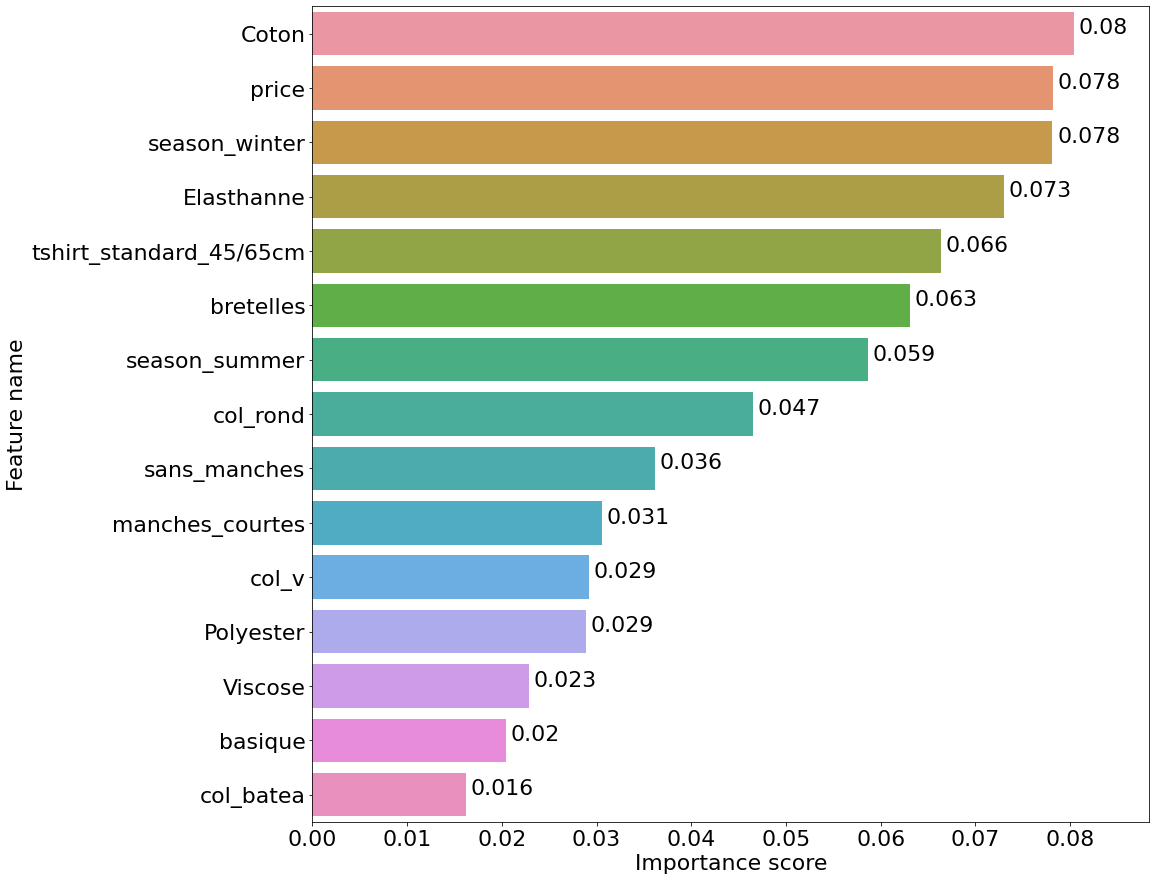

In [314]:
plt.figure(figsize=(15,15))
# sorted_counts = data_table['Elasthanne'].value_counts()
# print(sorted_counts.head())
g = sns.barplot(y=feature_importance_RF_full.iloc[:15].index,
                x=feature_importance_RF_full.iloc[:15].values,
                orient = 'h')

g.set_ylabel('Feature name', fontsize=22)
g.set_xlabel('Importance score', fontsize=22)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.xlim(0,feature_importance_RF_full.values[0]+0.008)

for i in range(15):
    g.text(feature_importance_RF_full.values[i]+5e-4,
           i,
           np.round(feature_importance_RF_full.values[i],3), 
           color="black",ha="left",fontsize = 22)
plt.savefig("../../../saved_figs/Feature Importance/task1 FI RF FULL.pdf",dpi=1200,bbox_inches = 'tight')
plt.show()

### -----------Human-source dataset Feature importance

In [315]:
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(datasets_x[0],
                                                    datasets_y[0],
                                                test_size = 0.2,
                                               random_state = 11)

# if i ==0:
RF = RandomForestRegressor(n_estimators=2000,
                           max_features = 'log2',
                           ccp_alpha = 0.02,
                           random_state = 7)


RF.fit(X_train_i,y_train_i)
pred_train_i = RF.predict(X_train_i)
pred_test_i = RF.predict(X_test_i)

In [316]:
features_names = list(data_table_rnew)
print(len(features_names))
features_names.remove('potential_025')
features_names.remove('product_id')
feature_importance = pd.Series(RF.feature_importances_,
                                 index = features_names)
display(feature_importance)
print(type(feature_importance))

71


body                0.003386
bretelles           0.069137
cache_coeur         0.000023
col_batea           0.017521
col_bateau          0.000016
                      ...   
Polyamide           0.003129
Polyamide enduit    0.000283
Polyester           0.029758
Polypropylene       0.000000
Viscose             0.023543
Length: 69, dtype: float64

<class 'pandas.core.series.Series'>


In [317]:
feature_importance_RF_human = feature_importance.sort_values(ascending = False)
for i in range(len(feature_importance_RF_human)):
    if list(feature_importance.index)[i] in remove_list:
        del feature_importance_RF_human[list(feature_importance.index)[i]]
print(len(feature_importance_RF_human))

display(feature_importance_RF_human)
print(list(feature_importance_RF_human.index))
feature_importance_RF_human.to_csv('task1 RF_human_FI.csv')

65


Coton                      0.088272
season_winter              0.085222
price                      0.080200
Elasthanne                 0.076260
tshirt_standard_45/65cm    0.070474
                             ...   
cache_coeur                0.000023
col_polo                   0.000020
col_bateau                 0.000016
Lyocell                    0.000009
col_bénit                  0.000002
Length: 65, dtype: float64

['Coton', 'season_winter', 'price', 'Elasthanne', 'tshirt_standard_45/65cm', 'bretelles', 'season_summer', 'col_rond', 'sans_manches', 'col_v', 'manches_courtes', 'Polyester', 'Viscose', 'color_yellow', 'basique', 'col_batea', 'color_white', 'divers', 'color_red', 'débardeur', 'color_black', 'color_green', 'color_pink', 'manches_longues', 'color_beige', 'color_brown', 'color_blue', 'color_purple', 'col_carré', 'tshirt_court_(<45cm)', 'color_orange', 'manches_3/4', 'Lin', 'color_grey', 'dentelle', 'body', 'Polyamide', 'Modal', 'col_monta', 'sans_col', 'brodé', 'cropped', 'imprimé', 'Fibre metallisée', 'col_rapporté', 'fines', 'message', 'maille', 'côtelé', 'tshirt_bandeau', 'tshirt_asymétrique', 'col_montant', 'Acrylique', 'Polyamide enduit', 'tshirt_long_(>65cm)', 'dos_nu', 'col_bénitier', 'col_fendu', 'Autres fibres', 'col_roulé', 'cache_coeur', 'col_polo', 'col_bateau', 'Lyocell', 'col_bénit']


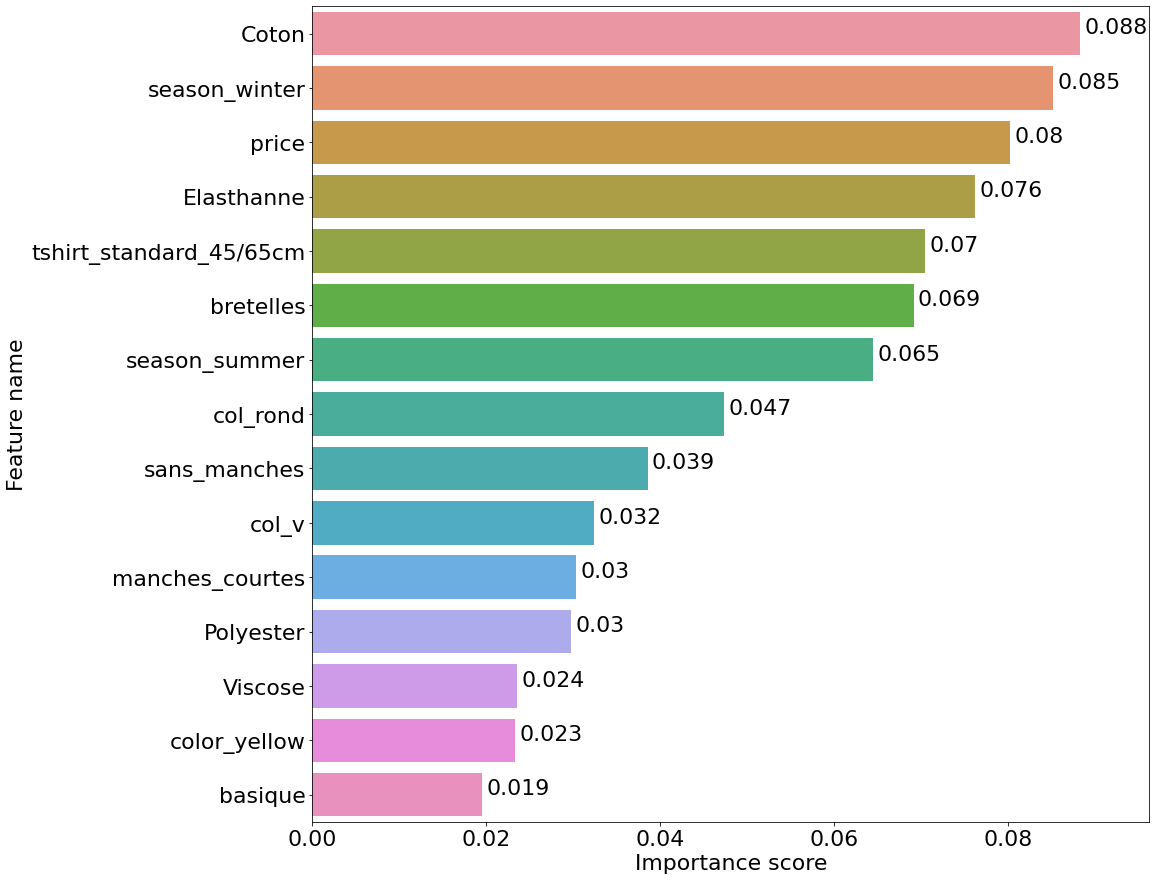

In [319]:
plt.figure(figsize=(15,15))
# sorted_counts = data_table['Elasthanne'].value_counts()
# print(sorted_counts.head())
g = sns.barplot(y=feature_importance_RF_human.iloc[:15].index,
                x=feature_importance_RF_human.iloc[:15].values,
                orient = 'h')
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
g.set_ylabel('Feature name', fontsize=22)
g.set_xlabel('Importance score', fontsize=22)
plt.xlim(0,feature_importance_RF_human.values[0]+0.008)

for i in range(15):
    g.text(feature_importance_RF_human.values[i]+5e-4,
           i,
           np.round(feature_importance_RF_human.values[i],3), 
           color="black",ha="left",fontsize = 22)
plt.savefig("../../../saved_figs/Feature Importance/task1 FI RF HUMAN.pdf",dpi=1200,bbox_inches = 'tight')
plt.show()

# Decision Tree

In [53]:
##Grid search
optimal_hp = []
DT_dataframe = []
for i in range(len(datasets)):
    X_train, X_test, y_train, y_test = train_test_split(
        datasets_x[i], datasets_y[i], train_size=0.8, random_state=11)
    parameters = {"min_samples_leaf": np.arange(1,6,1),
                 'ccp_alpha':np.arange(0,0.1,0.01),
                  'max_features':['auto','sqrt','log2']}
    DT = DecisionTreeRegressor(min_samples_leaf = 10,ccp_alpha=0.02,
                                   random_state=0)
    models = GridSearchCV(DT, param_grid= parameters,
                       scoring = 'neg_mean_squared_error',cv = kf)
    
    grid = models.fit(X_train,y_train)
    reg = grid.best_estimator_
    print('--------Dataset ',i)
    print('best score: %f'%grid.best_score_)
    print('best parameters:')
    for key in parameters.keys():
        print('{}: {}'.format(key, reg.get_params()[key]))
        print('test score: %f'%reg.score(X_test, y_test))
    DT_dataframe.append(pd.DataFrame(grid.cv_results_).T)
# display(Ridge_dataframe)

--------Dataset  0
best score: -108.337801
best parameters:
min_samples_leaf: 3
test score: 0.406792
ccp_alpha: 0.03
test score: 0.406792
max_features: sqrt
test score: 0.406792
--------Dataset  1
best score: -116.495500
best parameters:
min_samples_leaf: 2
test score: 0.366574
ccp_alpha: 0.07
test score: 0.366574
max_features: auto
test score: 0.366574


In [54]:
DT_metrics = []

time_start = time.time()

for i in range(len(datasets)):
    metrics = []
    MSE_ave = 0
    MAE_ave = 0
    MAPE_ave = 0
    r2_ave = 0

    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(datasets_x[i],
                                                        datasets_y[i],
                                                    test_size = 0.2,
                                                   random_state = 11)
    if i==0:
        DT = DecisionTreeRegressor(min_samples_leaf = 3,ccp_alpha=0.03,
                                   max_features = 'sqrt',
                                   random_state=0)
    else:
        DT = DecisionTreeRegressor(min_samples_leaf = 2,ccp_alpha=0.07,
                                   max_features = 'auto',
                                   random_state=0)
    DT.fit(X_train_i,y_train_i)
    pred_train_i = DT.predict(X_train_i)
    pred_test_i = DT.predict(X_test_i)

    metrics_list = [MSE,MAE,MAPE,sklearn.metrics.r2_score]

    for f in metrics_list:
        metric_result_train = f(y_train_i,pred_train_i)
        metrics.append(metric_result_train)
        metric_result_test = f(y_test_i,pred_test_i)
        metrics.append(metric_result_test)
    

    
    DT_metrics.append(metrics)

time_end = time.time()

total_time = time_end-time_start
print('total time: ', total_time)
print(DT_metrics)

total time:  0.03268098831176758
[[59.21861253054002, 91.9905057587727, 4.035360046875557, 5.014024841075422, 0.49763482535334724, 0.5456612082919253, 0.620123479552026, 0.4067917057277831], [33.51701615943535, 98.22713916837358, 3.260664185421211, 4.9988686529884765, 0.4380573298390575, 0.5546857354309962, 0.7849944986826811, 0.366574265499636]]


In [98]:
# DT_metrics = []

# time_start = time.time()

# for i in range(len(datasets)):
#     metrics = []
#     MSE_ave = 0
#     MAE_ave = 0
#     MAPE_ave = 0
#     r2_ave = 0

# #     X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(datasets_x[i],
# #                                                         datasets_y[i],
# #                                                     test_size = 0.2,
# #                                                    random_state = 666)
#     for train_idx,val_idx in kf.split(datasets_x[i],datasets_y[i]):
#         train_X_k = datasets_x[i][train_idx]
#         train_y_k = datasets_y[i][train_idx]
#         val_X_k = datasets_x[i][val_idx]
#         val_y_k = datasets_y[i][val_idx]

#         dt = DecisionTreeRegressor(min_samples_leaf = 10,ccp_alpha=0.02,
#                                    random_state=0)
#         dt.fit(train_X_k,train_y_k)
#         pred_train_i = dt.predict(train_X_k)
#         pred_test_i = dt.predict(val_X_k)
    
#         metrics_list = [MSE,MAE,MAPE,sklearn.metrics.r2_score]

#         for f in metrics_list:
#             metric_result_train = f(train_y_k,pred_train_i)
#             metrics.append(metric_result_train)
#             metric_result_test = f(val_y_k,pred_test_i)
#             metrics.append(metric_result_test)
    
#     metrics = np.array(metrics).reshape(k,8)
#     metrics_i = []
#     for j in range(metrics.shape[1]):
#         metrics_i.append(metrics[:,j].mean())
    


    
#     DT_metrics.append(metrics_i)

# time_end = time.time()

# total_time = time_end-time_start
# print('total time: ', total_time)
# print(DT_metrics)

total time:  0.2488691806793213
[[80.07931040564128, 113.85933350250264, 4.441278627170148, 5.367532363308487, 0.5254820736888499, 0.6475243987528343, 0.4847159021378823, 0.24410236286064319], [78.65494411858405, 128.4953717665227, 4.387346422043566, 5.618445191355083, 0.5219855963327193, 0.6820069635862733, 0.4946487753239453, 0.14275145684865184]]


In [197]:
## New metric(Accuracy of top sellers)
accuracy_DT = []
accuracy_DT_tt = []
for i in range(len(datasets)):
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(datasets_x[i],
                                                        datasets_y[i],
                                                    test_size = 0.2,
                                                   random_state = 11)

    if i==0:
        DT = DecisionTreeRegressor(min_samples_leaf = 3,ccp_alpha=0.03,
                                   max_features = 'sqrt',
                                   random_state=0)
    else:
        DT = DecisionTreeRegressor(min_samples_leaf = 2,ccp_alpha=0.07,
                                   max_features = 'auto',
                                   random_state=0)
    DT.fit(X_train_i,y_train_i)
    pred_train_i = DT.predict(X_train_i)
    pred_test_i = DT.predict(X_test_i)
    
    sum_topsellers = 0
    correct_topsellers = 0
    correct_norm = 0
    
    for j in range(len(y_test_i)):
        if y_test_i[j] >= 18.5:
            sum_topsellers+=1
            if pred_test_i[j] >= 18.5:
                correct_topsellers += 1
        else:
            if pred_test_i[j] <18.5:
                correct_norm += 1
                
    accuracy_DT.append(correct_topsellers/sum_topsellers)
    accuracy_DT_tt.append((correct_norm+correct_topsellers)/len(y_test_i))
print('Total #top sellers:', sum_topsellers)
print('Accuracy: ', accuracy_DT)
print('total accuracy: ', accuracy_DT_tt)

Total #top sellers: 41
Accuracy:  [0.34146341463414637, 0.5121951219512195]
total accuracy:  [0.8777173913043478, 0.8831521739130435]


In [55]:
results_DT = np.array(DT_metrics)
print(results_DT.shape)
DT_results = pd.DataFrame(results_DT,columns= ['MSE_train','MSE_test',
                                               'MAE_train','MAE_test',
                                              'MAPE_train','MAPE_test',
                                              'r2_train','r2_test'])

potentials_names = ['reliable+new_potential',
                   'not_reliable+new_potential']
DT_results.index = potentials_names
display(DT_results)
# RF_results.to_csv('../dataset/results/RF_compare_seasonality.csv')

(2, 8)


,MSE_train,MSE_test,MAE_train,MAE_test,MAPE_train,MAPE_test,r2_train,r2_test
reliable+new_potential,59.218613,91.990506,4.035360,5.014025,0.497635,0.545661,0.620123,0.406792
not_reliable+new_potential,33.517016,98.227139,3.260664,4.998869,0.438057,0.554686,0.784994,0.366574


### SVM Regressor

In [57]:
##Grid search
optimal_hp = []
SVM_dataframe = []
for i in range(len(datasets)):
    X_train, X_test, y_train, y_test = train_test_split(
        datasets_x[i], datasets_y[i], train_size=0.8, random_state=11)
    parameters = {"kernel": ("linear", 'rbf'), #, 'sigmoid'), 
                  "C": np.arange(18,25,1), 
                  "gamma": np.logspace(-3, 4, 8)}
    svr = GridSearchCV(SVR(), param_grid= parameters,
                       scoring = 'neg_mean_absolute_error',cv = kf)
    grid = svr.fit(X_train,y_train)
    reg = grid.best_estimator_
    print('--------Dataset ',i)
    print('best score: %f'%grid.best_score_)
    print('best parameters:')
    for key in parameters.keys():
        print('{}: {}'.format(key, reg.get_params()[key]))
        print('test score: %f'%reg.score(X_test, y_test))
    SVM_dataframe.append(pd.DataFrame(grid.cv_results_).T)
# display(SVM_dataframe)

--------Dataset  0
best score: -4.734493
best parameters:
kernel: rbf
test score: 0.336001
C: 20
test score: 0.336001
gamma: 1000.0
test score: 0.336001
--------Dataset  1
best score: -4.755252
best parameters:
kernel: rbf
test score: 0.342273
C: 18
test score: 0.342273
gamma: 1000.0
test score: 0.342273


In [58]:
i == 1
X_train, X_test, y_train, y_test = train_test_split(
    datasets_x[i], datasets_y[i], train_size=0.8, random_state=11)
parameters = {"kernel": ("linear", 'rbf'), #, 'sigmoid'), 
              "C": np.arange(15,25,1), 
              "gamma": [1000]}
svr = GridSearchCV(SVR(), param_grid= parameters,
                   scoring = 'neg_mean_absolute_error',cv = kf)
grid = svr.fit(X_train,y_train)
reg = grid.best_estimator_
print('--------Dataset ',i)
print('best score: %f'%grid.best_score_)
print('best parameters:')
for key in parameters.keys():
    print('{}: {}'.format(key, reg.get_params()[key]))
    print('test score: %f'%reg.score(X_test, y_test))

--------Dataset  1
best score: -4.755252
best parameters:
kernel: rbf
test score: 0.342273
C: 18
test score: 0.342273
gamma: 1000
test score: 0.342273


In [51]:
# SVM_metrics = []

# time_start = time.time()

# for i in range(len(datasets)):
#     metrics = []
#     MSE_ave = 0
#     MAE_ave = 0
#     MAPE_ave = 0
#     r2_ave = 0

# #     X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(datasets_x[i],
# #                                                         datasets_y[i],
# #                                                     test_size = 0.2,
# #                                                    random_state = 666)

#     for train_idx,val_idx in kf.split(datasets_x[i],datasets_y[i]):
#         train_X_k = datasets_x[i][train_idx]
#         train_y_k = datasets_y[i][train_idx]
#         val_X_k = datasets_x[i][val_idx]
#         val_y_k = datasets_y[i][val_idx]

               
#         SVM = SVR(kernel = 'rbf',C = 10, gamma = 1000)
#         SVM.fit(train_X_k,train_y_k)
#         pred_train_i = SVM.predict(train_X_k)
#         pred_test_i = SVM.predict(val_X_k)
    
#         metrics_list = [MSE,MAE,MAPE,sklearn.metrics.r2_score]

#         for f in metrics_list:
#             metric_result_train = f(train_y_k,pred_train_i)
#             metrics.append(metric_result_train)
#             metric_result_test = f(val_y_k,pred_test_i)
#             metrics.append(metric_result_test)
    
#     metrics = np.array(metrics).reshape(k,8)
#     metrics_i = []
#     for j in range(metrics.shape[1]):
#         metrics_i.append(metrics[:,j].mean())
    


    
#     SVM_metrics.append(metrics_i)

# time_end = time.time()

# total_time = time_end-time_start
# print('total time: ', total_time)
# print(DT_metrics)

total time:  10.432484865188599
[[10.726442308330286, 135.03698006214225, 0.882251384594048, 5.4728701276375284, 0.09335852210565346, 0.6520555122205612, 0.9309189127555019, 0.1945934001461978], [6.571119898317688, 124.17294531569799, 0.5322005903909188, 5.465373504896901, 0.04911318370237947, 0.6534081875122639, 0.9575104630979691, 0.19022388304605128]]


In [59]:
SVM_metrics = []

time_start = time.time()

for i in range(len(datasets)):
    metrics = []
    MSE_ave = 0
    MAE_ave = 0
    MAPE_ave = 0
    r2_ave = 0

    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(datasets_x[i],
                                                        datasets_y[i],
                                                    test_size = 0.2,
                                                   random_state = 11)
    if i ==0:
        SVM = SVR(kernel = 'rbf',C = 20, gamma = 1000)
    else:
        SVM = SVR(kernel = 'rbf',C = 18, gamma = 1000)
    SVM.fit(X_train_i,y_train_i)
    pred_train_i = SVM.predict(X_train_i)
    pred_test_i = SVM.predict(X_test_i)

    metrics_list = [MSE,MAE,MAPE,sklearn.metrics.r2_score]

    for f in metrics_list:
        metric_result_train = f(y_train_i,pred_train_i)
        metrics.append(metric_result_train)
        metric_result_test = f(y_test_i,pred_test_i)
        metrics.append(metric_result_test)
       
    SVM_metrics.append(metrics)

time_end = time.time()

total_time = time_end-time_start
print('total time: ', total_time)
print(SVM_metrics)

total time:  1.3657567501068115
[[75.88157807365184, 102.96822681919238, 2.43045990260308, 4.360824008399508, 0.1770151338371728, 0.4297443682671719, 0.5132336167137607, 0.33600097431986586], [71.88028200184682, 101.99567282446282, 2.193712638500411, 4.428934672452828, 0.14203414223954125, 0.44103559063164827, 0.5389011959441175, 0.34227256823646013]]


In [198]:
## New metric(Accuracy of top sellers)
accuracy_SVR = []
accuracy_SVR_tt = []
for i in range(len(datasets)):
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(datasets_x[i],
                                                        datasets_y[i],
                                                    test_size = 0.2,
                                                   random_state = 11)

    if i ==0:
        SVM = SVR(kernel = 'rbf',C = 20, gamma = 1000)
    else:
        SVM = SVR(kernel = 'rbf',C = 18, gamma = 1000)
    SVM.fit(X_train_i,y_train_i)
    pred_train_i = SVM.predict(X_train_i)
    pred_test_i = SVM.predict(X_test_i)
    
    sum_topsellers = 0
    correct_topsellers = 0
    correct_norm = 0
    
    for j in range(len(y_test_i)):
        if y_test_i[j] >= 18.5:
            sum_topsellers+=1
            if pred_test_i[j] >= 18.5:
                correct_topsellers += 1
        else:
            if pred_test_i[j] <18.5:
                correct_norm += 1
                
    accuracy_SVR.append(correct_topsellers/sum_topsellers)
    accuracy_SVR_tt.append((correct_norm+correct_topsellers)/len(y_test_i))
print('Total #top sellers:', sum_topsellers)
print('Accuracy: ', accuracy_SVR)
print('total accuracy: ', accuracy_SVR_tt)

Total #top sellers: 41
Accuracy:  [0.43902439024390244, 0.4146341463414634]
total accuracy:  [0.9184782608695652, 0.907608695652174]


In [60]:
results_SVM = np.array(SVM_metrics)
print(results_SVM.shape)
SVM_results = pd.DataFrame(results_SVM,columns= ['MSE_train','MSE_test',
                                               'MAE_train','MAE_test',
                                              'MAPE_train','MAPE_test',
                                              'r2_train','r2_test'])

potentials_names = ['reliable+new_potential',
                   'not_reliable+new_potential']
SVM_results.index = potentials_names
display(SVM_results)
# RF_results.to_csv('../dataset/results/RF_compare_seasonality.csv')

(2, 8)


,MSE_train,MSE_test,MAE_train,MAE_test,MAPE_train,MAPE_test,r2_train,r2_test
reliable+new_potential,75.881578,102.968227,2.430460,4.360824,0.177015,0.429744,0.513234,0.336001
not_reliable+new_potential,71.880282,101.995673,2.193713,4.428935,0.142034,0.441036,0.538901,0.342273


# K Neighbours Regressor

In [48]:
##Grid search
optimal_hp = []
KN_dataframe = []
for i in range(len(datasets)):
    X_train, X_test, y_train, y_test = train_test_split(
        datasets_x[i], datasets_y[i], train_size=0.8, random_state=11)
    parameters = {"n_neighbors": np.arange(10,60,1),
                 'weights':['uniform', 'distance']}
    KN = KNeighborsRegressor(n_neighbors=10, weights='distance')
    models = GridSearchCV(KN, param_grid= parameters,
                       scoring = 'neg_mean_squared_error',cv = kf)
    
    grid = models.fit(X_train,y_train)
    reg = grid.best_estimator_
    print('--------Dataset ',i)
    print('best score: %f'%grid.best_score_)
    print('best parameters:')
    for key in parameters.keys():
        print('{}: {}'.format(key, reg.get_params()[key]))
        print('test score: %f'%reg.score(X_test, y_test))
    KN_dataframe.append(pd.DataFrame(grid.cv_results_).T)
# display(Ridge_dataframe)

--------Dataset  0
best score: -99.803038
best parameters:
n_neighbors: 37
test score: 0.392722
weights: distance
test score: 0.392722
--------Dataset  1
best score: -91.636629
best parameters:
n_neighbors: 33
test score: 0.388645
weights: distance
test score: 0.388645


In [49]:
KN_metrics = []

time_start = time.time()

for i in range(len(datasets)):
    metrics = []
    MSE_ave = 0
    MAE_ave = 0
    MAPE_ave = 0
    r2_ave = 0

    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(datasets_x[i],
                                                        datasets_y[i],
                                                    test_size = 0.2,
                                                   random_state = 11)
    if i ==0:
        KN = KNeighborsRegressor(n_neighbors=37, weights='distance')
    else:
        KN = KNeighborsRegressor(n_neighbors=33, weights='distance')
    KN.fit(X_train_i,y_train_i)
    pred_train_i = KN.predict(X_train_i)
    pred_test_i = KN.predict(X_test_i)

    metrics_list = [MSE,MAE,MAPE,sklearn.metrics.r2_score]

    for f in metrics_list:
        metric_result_train = f(y_train_i,pred_train_i)
        metrics.append(metric_result_train)
        metric_result_test = f(y_test_i,pred_test_i)
        metrics.append(metric_result_test)
       
    KN_metrics.append(metrics)

time_end = time.time()

total_time = time_end-time_start
print('total time: ', total_time)
print(KN_metrics)

total time:  0.13061285018920898
[[12.235244426689178, 94.1723536569091, 0.8819348999096143, 4.875182570378224, 0.08852575412345634, 0.5902072126905091, 0.9215131547156029, 0.39272188124601615], [7.384831138500293, 94.8046148276844, 0.5160504827504058, 4.960719819671778, 0.04167766009858131, 0.6085636532689852, 0.9526276648993999, 0.38864469341498376]]


In [13]:
# KN_metrics = []

# time_start = time.time()
# for i in range(len(datasets)):
#     MAPE_op = 1
#     n_op = 0
#     metrics_op = []

# #     X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(datasets_x[i],
# #                                                         datasets_y[i],
# #                                                     test_size = 0.2,
# #                                                    random_state = 666)
#     for n in range(28,60):
#         metrics = []
#         for train_idx,val_idx in kf.split(datasets_x[i],datasets_y[i]):
#             train_X_k = datasets_x[i][train_idx]
#             train_y_k = datasets_y[i][train_idx]
#             val_X_k = datasets_x[i][val_idx]
#             val_y_k = datasets_y[i][val_idx]
            


#             kn = KNeighborsRegressor(n_neighbors=n, weights='distance')
#             kn.fit(train_X_k,train_y_k)
#             pred_train_i = kn.predict(train_X_k)
#             pred_test_i = kn.predict(val_X_k)

#             metrics_list = [MSE,MAE,MAPE,sklearn.metrics.r2_score]

#             for f in metrics_list:
#                 metric_result_train = f(train_y_k,pred_train_i)
#                 metrics.append(metric_result_train)
#                 metric_result_test = f(val_y_k,pred_test_i)
#                 metrics.append(metric_result_test)
    
#         metrics = np.array(metrics).reshape(k,8)
#         metrics_i = []
#         for j in range(metrics.shape[1]):
#             metrics_i.append(metrics[:,j].mean())
#         metrics_i.append(n)
#         ## find lowest MAPE
#         if metrics_i[-4] < MAPE_op:
#             MAPE_op = metrics_i[-4]
#             n_op = n
#             metrics_op = metrics_i
    

    
#     KN_metrics.append(metrics_op)

# time_end = time.time()
# total_time = time_end-time_start
# print('total time: ', total_time)
# print(KN_metrics)

total time:  20.060872077941895
[[10.257865719147722, 106.11561382861332, 0.8141699131818552, 5.210962075610648, 0.08304299488151608, 0.6684152285614294, 0.9339192166593847, 0.33606659040619113, 34], [6.234022331585346, 106.45447608450374, 0.48072330759615794, 5.23526743522541, 0.04200280231862103, 0.6851069029973121, 0.95966339870127, 0.3144551351689532, 29]]


In [199]:
## New metric(Accuracy of top sellers)
accuracy_KN = []
accuracy_KN_tt = []
for i in range(len(datasets)):
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(datasets_x[i],
                                                        datasets_y[i],
                                                    test_size = 0.2,
                                                   random_state = 11)

    if i ==0:
        KN = KNeighborsRegressor(n_neighbors=37, weights='distance')
    else:
        KN = KNeighborsRegressor(n_neighbors=33, weights='distance')
    KN.fit(X_train_i,y_train_i)
    pred_train_i = KN.predict(X_train_i)
    pred_test_i = KN.predict(X_test_i)
    
    sum_topsellers = 0
    correct_topsellers = 0
    correct_norm = 0
    
    for j in range(len(y_test_i)):
        if y_test_i[j] >= 18.5:
            sum_topsellers+=1
            if pred_test_i[j] >= 18.5:
                correct_topsellers += 1
        else:
            if pred_test_i[j] <18.5:
                correct_norm += 1
                
    accuracy_KN.append(correct_topsellers/sum_topsellers)
    accuracy_KN_tt.append((correct_norm+correct_topsellers)/len(y_test_i))
print('Total #top sellers:', sum_topsellers)
print('Accuracy: ', accuracy_KN)
print('total accuracy: ', accuracy_KN_tt)

Total #top sellers: 41
Accuracy:  [0.5121951219512195, 0.5121951219512195]
total accuracy:  [0.907608695652174, 0.9021739130434783]


In [51]:
results_KN = np.array(KN_metrics)
print(results_KN.shape)
KN_results = pd.DataFrame(results_KN,columns= ['MSE_train','MSE_test',
                                               'MAE_train','MAE_test',
                                              'MAPE_train','MAPE_test',
                                              'r2_train','r2_test'])

potentials_names = ['reliable+new_potential',
                   'not_reliable+new_potential']
KN_results.index = potentials_names
display(KN_results)
# KN_results.to_csv('../dataset/results/KN_compare_seasonality.csv')

(2, 8)


,MSE_train,MSE_test,MAE_train,MAE_test,MAPE_train,MAPE_test,r2_train,r2_test
reliable+new_potential,12.235244,94.172354,0.881935,4.875183,0.088526,0.590207,0.921513,0.392722
not_reliable+new_potential,7.384831,94.804615,0.516050,4.960720,0.041678,0.608564,0.952628,0.388645


# Simple NN

In [122]:
class Net(nn.Module):
    def __init__(self,n_input,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden1 = nn.Linear(n_input,n_hidden)
        self.hidden2 = nn.Linear(n_hidden,n_hidden)
        self.predict = nn.Linear(n_hidden,n_output)
    def forward(self,input):
        out = self.hidden1(input)
        out = F.relu(out)
        out = self.hidden2(out)
        out = F.relu(out)
        out =self.predict(out)

        return out

In [126]:
# NN_metrics = []

# time_start = time.time()

# for i in range(len(datasets)):
#     metrics = []

# #     X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(datasets_x[i],
# #                                                         datasets_y[i],
# #                                                     test_size = 0.2,
# #                                                    random_state = 666)
#     x_tensor_i = torch.tensor(datasets_x[i]).float()
#     y_tensor_i = torch.tensor(datasets_y[i]).float()
#     y_tensor_i = y_tensor_i.reshape(y_tensor_i.shape[0],1)
# #     print(y_tensor_i.size())
    
#     for train_idx,val_idx in kf.split(x_tensor_i,y_tensor_i):
#         train_X_k = x_tensor_i[train_idx]
#         train_y_k = y_tensor_i[train_idx]
#         val_X_k = x_tensor_i[val_idx]
#         val_y_k = y_tensor_i[val_idx]

#         net = Net(datasets_x[i].shape[1],200,200,200,1)
#         optimizer = torch.optim.Adam(net.parameters(),lr = 0.1)
#         loss_func = torch.nn.MSELoss()

#         for t in range(5000):
#             prediction = net(train_X_k)
#             loss = loss_func(prediction,train_y_k)

#             optimizer.zero_grad()
#             loss.backward()
#             optimizer.step()
        
#         pred_train_i = net(train_X_k)
#         pred_test_i = net(val_X_k)
    
#         metrics_list = [MSE,MAE,MAPE,sklearn.metrics.r2_score]

#         for f in metrics_list:
#             metric_result_train = f(train_y_k.detach().numpy(),pred_train_i.detach().numpy())
#             metrics.append(metric_result_train)
#             metric_result_test = f(val_y_k.detach().numpy(),pred_test_i.detach().numpy())
#             metrics.append(metric_result_test)
    
#     metrics = np.array(metrics).reshape(k,8)
#     metrics_i = []
#     for j in range(metrics.shape[1]):
#         metrics_i.append(metrics[:,j].mean())
    


    
#     NN_metrics.append(metrics_i)

# time_end = time.time()

# total_time = time_end-time_start
# print('total time: ', total_time)
# print(NN_metrics)

TypeError: __init__() takes 4 positional arguments but 6 were given

In [129]:
NN_metrics = []

time_start = time.time()

for i in range(len(datasets)):
    metrics = []
    


    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(datasets_x[i],
                                                        datasets_y[i],
                                                    test_size = 0.2,
                                                   random_state = 11)
    
    
    X_train_i = torch.tensor(X_train_i).float()
    X_test_i = torch.tensor(X_test_i).float()
    y_train_i = torch.tensor(y_train_i).float()
    y_test_i = torch.tensor(y_test_i).float()
    y_train_i = y_train_i.reshape(y_train_i.shape[0],1)
    y_test_i = y_test_i.reshape(y_test_i.shape[0],1)
    
    
    
    net = Net(datasets_x[i].shape[1],50,1)
    
    for params in net.parameters():  # 对网络中的每个参数
    torch.nn.init.normal_(params, mean=0, std=0.01)  # 初始化为服从均值0标准差0.01正态分布
    
    optimizer = torch.optim.Adam(net.parameters(),lr = 0.1, weight_decay=1e-2)
    loss_func = torch.nn.MSELoss()

    for t in range(5000):
        prediction = net(X_train_i)
        loss = loss_func(prediction,y_train_i)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    pred_train_i = net(X_train_i)
    pred_test_i = net(X_test_i)
    
    

    metrics_list = [MSE,MAE,MAPE,sklearn.metrics.r2_score]

    for f in metrics_list:
        metric_result_train = f(y_train_i.detach().numpy(),pred_train_i.detach().numpy())
        metrics.append(metric_result_train)
        metric_result_test = f(y_test_i.detach().numpy(),pred_test_i.detach().numpy())
        metrics.append(metric_result_test)
       
    NN_metrics.append(metrics)

time_end = time.time()

total_time = time_end-time_start
print('total time: ', total_time)
print(NN_metrics)

/Users/johnsonqi/opt/anaconda3/envs/MLPR/lib/python3.7/site-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/Users/johnsonqi/opt/anaconda3/envs/MLPR/lib/python3.7/site-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


total time:  122.81965112686157
[[155.90314, 155.08046, 6.580556, 6.3488903, 0.8790493, 0.8114956, -8.993959145109365e-05, -4.8946747209122066e-05], [146.11844, 147.14882, 6.4394317, 6.2922993, 0.85395586, 0.7948439, 0.06267697619845991, 0.051098847547020765]]


In [124]:
NN_metrics = []

time_start = time.time()

for i in range(len(datasets)):
    metrics = []
    


    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(datasets_x[i],
                                                        datasets_y[i],
                                                    test_size = 0.2,
                                                   random_state = 11)
    
    
    X_train_i = torch.tensor(X_train_i).float()
    X_test_i = torch.tensor(X_test_i).float()
    y_train_i = torch.tensor(y_train_i).float()
    y_test_i = torch.tensor(y_test_i).float()
    y_train_i = y_train_i.reshape(y_train_i.shape[0],1)
    y_test_i = y_test_i.reshape(y_test_i.shape[0],1)
    
    
    BATCH_SIZE = 50
    LR = 0.02
    EPOCH = 5
    
    torch_data = torch.utils.data.TensorDataset(X_train_i, y_train_i)
    loader = torch.utils.data.DataLoader(dataset=torch_data, batch_size=BATCH_SIZE, shuffle=True)
    
    net = Net(datasets_x[i].shape[1],50,1)
    
    for params in net.parameters():  
        torch.nn.init.normal_(params, mean=0, std=0.01)
    
    optimizer = torch.optim.Adam(net.parameters(),lr = 0.1, weight_decay=1e-2)
    loss_func = torch.nn.MSELoss()

    
    ALL_LOSS = []
    for epoch in range(EPOCH):
#         with tqdm(
#                 iterable=loader,
#                 bar_format='{desc} {n_fmt:>4s}/{total_fmt:<4s} {percentage:3.0f}%|{bar}| {postfix}',
#         ) as t:
#         print('epoch', epoch)
        start_time = datetime.now()
        loss_list = []
        loop = tqdm(enumerate(loader), total =len(loader))
        for step,(b_x, b_y) in loop:

#             time.sleep(1)
            pre = net(b_x)
            loss = loss_func(pre, b_y)
            loss_list.append(loss)
            cur_time = datetime.now()
            delta_time = cur_time-start_time
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            print(loss)
            ALL_LOSS.append(loss)
            loop.set_description(f'Epoch [{epoch}/{EPOCH}]')
            loop.set_postfix(loss = loss.item())
            
    pred_train_i = net(X_train_i)
    pred_test_i = net(X_test_i)
    

    metrics_list = [MSE,MAE,MAPE,sklearn.metrics.r2_score]

    for f in metrics_list:
        metric_result_train = f(y_train_i.detach().numpy(),pred_train_i.detach().numpy())
        metrics.append(metric_result_train)
        metric_result_test = f(y_test_i.detach().numpy(),pred_test_i.detach().numpy())
        metrics.append(metric_result_test)
       
    NN_metrics.append(metrics)

time_end = time.time()

total_time = time_end-time_start
print('total time: ', total_time)
print(NN_metrics)

Epoch [0/5]: 100%|██████████| 30/30 [00:00<00:00, 367.90it/s, loss=1.17e+3]


tensor(226.3842, grad_fn=<MseLossBackward>)
tensor(236.2220, grad_fn=<MseLossBackward>)
tensor(215.5879, grad_fn=<MseLossBackward>)
tensor(275.0879, grad_fn=<MseLossBackward>)
tensor(90.0678, grad_fn=<MseLossBackward>)
tensor(141.4034, grad_fn=<MseLossBackward>)
tensor(29.8807, grad_fn=<MseLossBackward>)
tensor(87.4513, grad_fn=<MseLossBackward>)
tensor(343.4973, grad_fn=<MseLossBackward>)
tensor(490.3825, grad_fn=<MseLossBackward>)
tensor(82.1167, grad_fn=<MseLossBackward>)
tensor(180.0603, grad_fn=<MseLossBackward>)
tensor(239.5218, grad_fn=<MseLossBackward>)
tensor(61.1066, grad_fn=<MseLossBackward>)
tensor(305.3087, grad_fn=<MseLossBackward>)
tensor(531.0523, grad_fn=<MseLossBackward>)
tensor(61.6298, grad_fn=<MseLossBackward>)
tensor(82.8830, grad_fn=<MseLossBackward>)
tensor(81.7589, grad_fn=<MseLossBackward>)
tensor(214.8098, grad_fn=<MseLossBackward>)
tensor(87.6938, grad_fn=<MseLossBackward>)
tensor(147.1823, grad_fn=<MseLossBackward>)
tensor(226.4325, grad_fn=<MseLossBackward

Epoch [1/5]: 100%|██████████| 30/30 [00:00<00:00, 295.73it/s, loss=477]


tensor(142.8106, grad_fn=<MseLossBackward>)
tensor(198.3203, grad_fn=<MseLossBackward>)
tensor(62.7656, grad_fn=<MseLossBackward>)
tensor(219.9774, grad_fn=<MseLossBackward>)
tensor(90.5965, grad_fn=<MseLossBackward>)
tensor(187.7975, grad_fn=<MseLossBackward>)
tensor(285.5674, grad_fn=<MseLossBackward>)
tensor(38.8605, grad_fn=<MseLossBackward>)
tensor(94.8261, grad_fn=<MseLossBackward>)
tensor(370.3701, grad_fn=<MseLossBackward>)
tensor(176.8907, grad_fn=<MseLossBackward>)
tensor(495.1807, grad_fn=<MseLossBackward>)
tensor(52.8993, grad_fn=<MseLossBackward>)
tensor(102.2579, grad_fn=<MseLossBackward>)
tensor(43.6738, grad_fn=<MseLossBackward>)
tensor(73.3784, grad_fn=<MseLossBackward>)
tensor(129.1713, grad_fn=<MseLossBackward>)
tensor(44.3783, grad_fn=<MseLossBackward>)
tensor(62.5207, grad_fn=<MseLossBackward>)
tensor(57.9938, grad_fn=<MseLossBackward>)
tensor(42.1480, grad_fn=<MseLossBackward>)
tensor(159.6460, grad_fn=<MseLossBackward>)
tensor(68.2058, grad_fn=<MseLossBackward>)


Epoch [2/5]:   0%|          | 0/30 [00:00<?, ?it/s, loss=235] 

tensor(257.0012, grad_fn=<MseLossBackward>)
tensor(150.7194, grad_fn=<MseLossBackward>)
tensor(132.0040, grad_fn=<MseLossBackward>)
tensor(77.6598, grad_fn=<MseLossBackward>)
tensor(235.0134, grad_fn=<MseLossBackward>)


Epoch [2/5]:   0%|          | 0/30 [00:00<?, ?it/s, loss=500] 

tensor(186.6812, grad_fn=<MseLossBackward>)
tensor(61.5911, grad_fn=<MseLossBackward>)
tensor(154.7175, grad_fn=<MseLossBackward>)
tensor(199.4740, grad_fn=<MseLossBackward>)
tensor(67.6246, grad_fn=<MseLossBackward>)
tensor(65.5447, grad_fn=<MseLossBackward>)
tensor(136.0912, grad_fn=<MseLossBackward>)
tensor(108.3967, grad_fn=<MseLossBackward>)
tensor(22.7912, grad_fn=<MseLossBackward>)
tensor(203.8004, grad_fn=<MseLossBackward>)
tensor(45.8452, grad_fn=<MseLossBackward>)
tensor(44.0325, grad_fn=<MseLossBackward>)
tensor(95.5322, grad_fn=<MseLossBackward>)
tensor(139.6100, grad_fn=<MseLossBackward>)
tensor(28.7433, grad_fn=<MseLossBackward>)
tensor(31.5858, grad_fn=<MseLossBackward>)
tensor(18.9743, grad_fn=<MseLossBackward>)
tensor(271.5610, grad_fn=<MseLossBackward>)
tensor(127.8665, grad_fn=<MseLossBackward>)
tensor(84.3070, grad_fn=<MseLossBackward>)
tensor(76.5934, grad_fn=<MseLossBackward>)
tensor(499.5159, grad_fn=<MseLossBackward>)


Epoch [2/5]: 100%|██████████| 30/30 [00:00<00:00, 270.21it/s, loss=130]


tensor(472.9013, grad_fn=<MseLossBackward>)
tensor(275.6912, grad_fn=<MseLossBackward>)
tensor(129.7960, grad_fn=<MseLossBackward>)


Epoch [3/5]:   0%|          | 0/30 [00:00<?, ?it/s, loss=344] 

tensor(361.4972, grad_fn=<MseLossBackward>)
tensor(43.6992, grad_fn=<MseLossBackward>)
tensor(511.7667, grad_fn=<MseLossBackward>)
tensor(104.3185, grad_fn=<MseLossBackward>)
tensor(11.7292, grad_fn=<MseLossBackward>)
tensor(51.2152, grad_fn=<MseLossBackward>)
tensor(30.9657, grad_fn=<MseLossBackward>)
tensor(113.6618, grad_fn=<MseLossBackward>)
tensor(76.5227, grad_fn=<MseLossBackward>)
tensor(137.3624, grad_fn=<MseLossBackward>)
tensor(353.0609, grad_fn=<MseLossBackward>)
tensor(36.4573, grad_fn=<MseLossBackward>)
tensor(91.9385, grad_fn=<MseLossBackward>)
tensor(144.0463, grad_fn=<MseLossBackward>)
tensor(123.9886, grad_fn=<MseLossBackward>)
tensor(243.0248, grad_fn=<MseLossBackward>)
tensor(57.2961, grad_fn=<MseLossBackward>)
tensor(129.1866, grad_fn=<MseLossBackward>)
tensor(34.3658, grad_fn=<MseLossBackward>)
tensor(296.3871, grad_fn=<MseLossBackward>)
tensor(84.8914, grad_fn=<MseLossBackward>)
tensor(197.3077, grad_fn=<MseLossBackward>)
tensor(128.5899, grad_fn=<MseLossBackward>

Epoch [3/5]: 100%|██████████| 30/30 [00:00<00:00, 301.31it/s, loss=114]


tensor(49.7055, grad_fn=<MseLossBackward>)
tensor(76.3883, grad_fn=<MseLossBackward>)
tensor(113.7341, grad_fn=<MseLossBackward>)


Epoch [4/5]:   0%|          | 0/30 [00:00<?, ?it/s, loss=181]

tensor(181.2739, grad_fn=<MseLossBackward>)


Epoch [4/5]:   0%|          | 0/30 [00:00<?, ?it/s, loss=68.4]

tensor(55.3689, grad_fn=<MseLossBackward>)
tensor(60.3116, grad_fn=<MseLossBackward>)
tensor(71.1091, grad_fn=<MseLossBackward>)
tensor(127.8317, grad_fn=<MseLossBackward>)
tensor(69.4689, grad_fn=<MseLossBackward>)
tensor(171.4772, grad_fn=<MseLossBackward>)
tensor(56.5423, grad_fn=<MseLossBackward>)
tensor(31.9250, grad_fn=<MseLossBackward>)
tensor(141.5693, grad_fn=<MseLossBackward>)
tensor(66.0602, grad_fn=<MseLossBackward>)
tensor(68.9512, grad_fn=<MseLossBackward>)
tensor(156.2012, grad_fn=<MseLossBackward>)
tensor(294.4176, grad_fn=<MseLossBackward>)
tensor(162.2351, grad_fn=<MseLossBackward>)
tensor(98.8515, grad_fn=<MseLossBackward>)
tensor(382.4687, grad_fn=<MseLossBackward>)
tensor(78.4480, grad_fn=<MseLossBackward>)
tensor(84.8612, grad_fn=<MseLossBackward>)
tensor(74.8519, grad_fn=<MseLossBackward>)
tensor(663.3063, grad_fn=<MseLossBackward>)
tensor(68.4005, grad_fn=<MseLossBackward>)
tensor(95.2584, grad_fn=<MseLossBackward>)


Epoch [4/5]:   0%|          | 0/30 [00:00<?, ?it/s, loss=83.5]

tensor(29.6995, grad_fn=<MseLossBackward>)
tensor(31.7230, grad_fn=<MseLossBackward>)
tensor(83.5183, grad_fn=<MseLossBackward>)


Epoch [4/5]: 100%|██████████| 30/30 [00:00<00:00, 242.90it/s, loss=46.5]


tensor(298.3148, grad_fn=<MseLossBackward>)
tensor(121.2754, grad_fn=<MseLossBackward>)
tensor(133.5129, grad_fn=<MseLossBackward>)
tensor(46.4770, grad_fn=<MseLossBackward>)


Epoch [0/5]:   0%|          | 0/30 [00:00<?, ?it/s, loss=223] 

tensor(100.7431, grad_fn=<MseLossBackward>)
tensor(596.0070, grad_fn=<MseLossBackward>)
tensor(39.5654, grad_fn=<MseLossBackward>)
tensor(278.2133, grad_fn=<MseLossBackward>)
tensor(398.4386, grad_fn=<MseLossBackward>)
tensor(61.7782, grad_fn=<MseLossBackward>)
tensor(32.8367, grad_fn=<MseLossBackward>)
tensor(160.5482, grad_fn=<MseLossBackward>)
tensor(117.1029, grad_fn=<MseLossBackward>)
tensor(260.3889, grad_fn=<MseLossBackward>)
tensor(97.8860, grad_fn=<MseLossBackward>)
tensor(223.3834, grad_fn=<MseLossBackward>)


Epoch [0/5]:   0%|          | 0/30 [00:00<?, ?it/s, loss=145]

tensor(182.9299, grad_fn=<MseLossBackward>)
tensor(169.8169, grad_fn=<MseLossBackward>)
tensor(167.3233, grad_fn=<MseLossBackward>)
tensor(144.8513, grad_fn=<MseLossBackward>)


Epoch [0/5]:   0%|          | 0/30 [00:00<?, ?it/s, loss=49.6]

tensor(49.6129, grad_fn=<MseLossBackward>)


Epoch [0/5]: 100%|██████████| 30/30 [00:00<00:00, 293.23it/s, loss=32.1]


tensor(449.0022, grad_fn=<MseLossBackward>)
tensor(62.2509, grad_fn=<MseLossBackward>)
tensor(21.1472, grad_fn=<MseLossBackward>)
tensor(80.4145, grad_fn=<MseLossBackward>)
tensor(44.3400, grad_fn=<MseLossBackward>)
tensor(193.1894, grad_fn=<MseLossBackward>)
tensor(202.0910, grad_fn=<MseLossBackward>)
tensor(58.7333, grad_fn=<MseLossBackward>)
tensor(161.4993, grad_fn=<MseLossBackward>)
tensor(126.0131, grad_fn=<MseLossBackward>)
tensor(76.7236, grad_fn=<MseLossBackward>)
tensor(155.5727, grad_fn=<MseLossBackward>)
tensor(32.0614, grad_fn=<MseLossBackward>)


Epoch [1/5]:   0%|          | 0/30 [00:00<?, ?it/s, loss=118] 

tensor(156.4010, grad_fn=<MseLossBackward>)
tensor(448.3976, grad_fn=<MseLossBackward>)
tensor(49.7322, grad_fn=<MseLossBackward>)
tensor(123.1550, grad_fn=<MseLossBackward>)
tensor(357.9278, grad_fn=<MseLossBackward>)
tensor(69.3376, grad_fn=<MseLossBackward>)
tensor(173.3975, grad_fn=<MseLossBackward>)
tensor(51.3257, grad_fn=<MseLossBackward>)
tensor(121.9295, grad_fn=<MseLossBackward>)
tensor(48.6056, grad_fn=<MseLossBackward>)
tensor(215.5335, grad_fn=<MseLossBackward>)
tensor(117.5837, grad_fn=<MseLossBackward>)


Epoch [1/5]:   0%|          | 0/30 [00:00<?, ?it/s, loss=70.2]

tensor(146.6236, grad_fn=<MseLossBackward>)
tensor(359.6262, grad_fn=<MseLossBackward>)
tensor(60.3052, grad_fn=<MseLossBackward>)
tensor(70.2337, grad_fn=<MseLossBackward>)


Epoch [1/5]:   0%|          | 0/30 [00:00<?, ?it/s, loss=323] 

tensor(76.9405, grad_fn=<MseLossBackward>)
tensor(155.7252, grad_fn=<MseLossBackward>)
tensor(45.8232, grad_fn=<MseLossBackward>)
tensor(139.5656, grad_fn=<MseLossBackward>)
tensor(140.4192, grad_fn=<MseLossBackward>)
tensor(101.1345, grad_fn=<MseLossBackward>)
tensor(63.0830, grad_fn=<MseLossBackward>)
tensor(360.0065, grad_fn=<MseLossBackward>)
tensor(60.9194, grad_fn=<MseLossBackward>)
tensor(66.5270, grad_fn=<MseLossBackward>)
tensor(176.8712, grad_fn=<MseLossBackward>)
tensor(63.2280, grad_fn=<MseLossBackward>)
tensor(322.7590, grad_fn=<MseLossBackward>)


Epoch [1/5]: 100%|██████████| 30/30 [00:00<00:00, 290.48it/s, loss=55.1]


tensor(55.1432, grad_fn=<MseLossBackward>)


Epoch [2/5]:   0%|          | 0/30 [00:00<?, ?it/s, loss=36.9]

tensor(156.6990, grad_fn=<MseLossBackward>)
tensor(211.8833, grad_fn=<MseLossBackward>)
tensor(342.5345, grad_fn=<MseLossBackward>)
tensor(53.1603, grad_fn=<MseLossBackward>)
tensor(118.0714, grad_fn=<MseLossBackward>)
tensor(100.2058, grad_fn=<MseLossBackward>)
tensor(566.7633, grad_fn=<MseLossBackward>)
tensor(197.7285, grad_fn=<MseLossBackward>)
tensor(100.5788, grad_fn=<MseLossBackward>)
tensor(35.5410, grad_fn=<MseLossBackward>)
tensor(36.9184, grad_fn=<MseLossBackward>)


Epoch [2/5]:   0%|          | 0/30 [00:00<?, ?it/s, loss=39.8]

tensor(191.9476, grad_fn=<MseLossBackward>)
tensor(97.9941, grad_fn=<MseLossBackward>)
tensor(39.7892, grad_fn=<MseLossBackward>)


Epoch [2/5]:   0%|          | 0/30 [00:00<?, ?it/s, loss=39.8]

tensor(85.7588, grad_fn=<MseLossBackward>)


Epoch [2/5]:   0%|          | 0/30 [00:00<?, ?it/s, loss=24.6]

tensor(59.7373, grad_fn=<MseLossBackward>)
tensor(39.5852, grad_fn=<MseLossBackward>)
tensor(78.4142, grad_fn=<MseLossBackward>)
tensor(86.2983, grad_fn=<MseLossBackward>)
tensor(93.7837, grad_fn=<MseLossBackward>)
tensor(119.0182, grad_fn=<MseLossBackward>)
tensor(28.7223, grad_fn=<MseLossBackward>)
tensor(98.6708, grad_fn=<MseLossBackward>)
tensor(174.3759, grad_fn=<MseLossBackward>)
tensor(55.5727, grad_fn=<MseLossBackward>)
tensor(173.4241, grad_fn=<MseLossBackward>)
tensor(24.6034, grad_fn=<MseLossBackward>)


Epoch [2/5]: 100%|██████████| 30/30 [00:00<00:00, 272.56it/s, loss=295]


tensor(102.9274, grad_fn=<MseLossBackward>)
tensor(529.3298, grad_fn=<MseLossBackward>)
tensor(294.5695, grad_fn=<MseLossBackward>)


Epoch [3/5]:   0%|          | 0/30 [00:00<?, ?it/s, loss=22.6]

tensor(125.1605, grad_fn=<MseLossBackward>)
tensor(111.3821, grad_fn=<MseLossBackward>)
tensor(127.6249, grad_fn=<MseLossBackward>)
tensor(500.7492, grad_fn=<MseLossBackward>)
tensor(220.6880, grad_fn=<MseLossBackward>)
tensor(37.5061, grad_fn=<MseLossBackward>)
tensor(76.8542, grad_fn=<MseLossBackward>)
tensor(22.6240, grad_fn=<MseLossBackward>)


Epoch [3/5]:   0%|          | 0/30 [00:00<?, ?it/s, loss=189] 

tensor(77.1067, grad_fn=<MseLossBackward>)
tensor(238.1720, grad_fn=<MseLossBackward>)
tensor(229.1910, grad_fn=<MseLossBackward>)
tensor(189.4317, grad_fn=<MseLossBackward>)


Epoch [3/5]:   0%|          | 0/30 [00:00<?, ?it/s, loss=166] 

tensor(56.8002, grad_fn=<MseLossBackward>)
tensor(147.3894, grad_fn=<MseLossBackward>)
tensor(75.2945, grad_fn=<MseLossBackward>)
tensor(195.9125, grad_fn=<MseLossBackward>)
tensor(59.4801, grad_fn=<MseLossBackward>)
tensor(37.2383, grad_fn=<MseLossBackward>)
tensor(121.2425, grad_fn=<MseLossBackward>)
tensor(107.0471, grad_fn=<MseLossBackward>)
tensor(38.6363, grad_fn=<MseLossBackward>)
tensor(62.7155, grad_fn=<MseLossBackward>)
tensor(168.4841, grad_fn=<MseLossBackward>)
tensor(103.1776, grad_fn=<MseLossBackward>)
tensor(166.0168, grad_fn=<MseLossBackward>)


Epoch [3/5]:   0%|          | 0/30 [00:00<?, ?it/s, loss=203] 

tensor(33.2682, grad_fn=<MseLossBackward>)
tensor(203.4357, grad_fn=<MseLossBackward>)


Epoch [3/5]: 100%|██████████| 30/30 [00:00<00:00, 296.24it/s, loss=32.3]


tensor(53.4327, grad_fn=<MseLossBackward>)
tensor(513.1685, grad_fn=<MseLossBackward>)
tensor(32.2972, grad_fn=<MseLossBackward>)


Epoch [4/5]:   0%|          | 0/30 [00:00<?, ?it/s, loss=133] 

tensor(132.0597, grad_fn=<MseLossBackward>)
tensor(152.7469, grad_fn=<MseLossBackward>)
tensor(65.3017, grad_fn=<MseLossBackward>)
tensor(181.6872, grad_fn=<MseLossBackward>)
tensor(169.5340, grad_fn=<MseLossBackward>)
tensor(47.8576, grad_fn=<MseLossBackward>)
tensor(132.7168, grad_fn=<MseLossBackward>)


Epoch [4/5]:   0%|          | 0/30 [00:00<?, ?it/s, loss=169] 

tensor(372.6064, grad_fn=<MseLossBackward>)
tensor(297.5475, grad_fn=<MseLossBackward>)
tensor(90.8567, grad_fn=<MseLossBackward>)
tensor(169.3556, grad_fn=<MseLossBackward>)


Epoch [4/5]:   0%|          | 0/30 [00:00<?, ?it/s, loss=37.5]

tensor(37.4564, grad_fn=<MseLossBackward>)


Epoch [4/5]:   0%|          | 0/30 [00:00<?, ?it/s, loss=46.7]

tensor(205.5693, grad_fn=<MseLossBackward>)
tensor(47.2950, grad_fn=<MseLossBackward>)
tensor(169.6269, grad_fn=<MseLossBackward>)
tensor(21.0356, grad_fn=<MseLossBackward>)
tensor(99.8197, grad_fn=<MseLossBackward>)
tensor(67.6955, grad_fn=<MseLossBackward>)
tensor(296.0007, grad_fn=<MseLossBackward>)
tensor(54.2487, grad_fn=<MseLossBackward>)
tensor(120.8657, grad_fn=<MseLossBackward>)
tensor(145.7370, grad_fn=<MseLossBackward>)
tensor(62.5682, grad_fn=<MseLossBackward>)
tensor(21.7342, grad_fn=<MseLossBackward>)
tensor(46.7219, grad_fn=<MseLossBackward>)


Epoch [4/5]:   0%|          | 0/30 [00:00<?, ?it/s, loss=53.8]

tensor(422.0127, grad_fn=<MseLossBackward>)
tensor(213.4277, grad_fn=<MseLossBackward>)
tensor(82.6343, grad_fn=<MseLossBackward>)
tensor(53.7701, grad_fn=<MseLossBackward>)


Epoch [4/5]: 100%|██████████| 30/30 [00:00<00:00, 277.61it/s, loss=9.44]


tensor(9.4395, grad_fn=<MseLossBackward>)
total time:  1.0961730480194092
[[130.81192, 136.6032, 5.834309, 5.540435, 0.7603418, 0.6602624, 0.16086552064563076, 0.1191031597123785], [159.54149, 164.79765, 5.4315434, 5.3922634, 0.44088092, 0.40714827, -0.023429267160901546, -0.0627111956947457]]


## ----MLPRegressor

In [170]:
##Grid search
optimal_hp = []
NN_dataframe = []
for i in range(len(datasets)):
    X_train, X_test, y_train, y_test = train_test_split(
        datasets_x[i], datasets_y[i], train_size=0.8, random_state=11)
    parameters = {'learning_rate_init':np.logspace(-5,-4,2),
                  'hidden_layer_sizes':[(300,300,300),(200,200,200)],
                 'beta_1':np.arange(0.75,0.85,0.05)}
    NN = MLPRegressor(hidden_layer_sizes=(100,50,20), activation='relu',
                      solver='adam',alpha=0.0001,max_iter=1000,
                      momentum = 0.5)
    models = GridSearchCV(NN, param_grid= parameters,
                       scoring = 'neg_mean_squared_error',cv = kf)
    
    grid = models.fit(X_train,y_train)
    reg = grid.best_estimator_
    print('--------Dataset ',i)
    print('best score: %f'%grid.best_score_)
    print('best parameters:')
    for key in parameters.keys():
        print('{}: {}'.format(key, reg.get_params()[key]))
        print('test score: %f'%reg.score(X_test, y_test))
    NN_dataframe.append(pd.DataFrame(grid.cv_results_).T)
# display(Ridge_dataframe)

/Users/johnsonqi/opt/anaconda3/envs/MLPR/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/johnsonqi/opt/anaconda3/envs/MLPR/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/johnsonqi/opt/anaconda3/envs/MLPR/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/johnsonqi/opt/anaconda3/envs/MLPR/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Opt

/Users/johnsonqi/opt/anaconda3/envs/MLPR/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/johnsonqi/opt/anaconda3/envs/MLPR/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/johnsonqi/opt/anaconda3/envs/MLPR/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/johnsonqi/opt/anaconda3/envs/MLPR/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Opt

--------Dataset  0
best score: -109.006151
best parameters:
learning_rate_init: 0.0001
test score: 0.194186
hidden_layer_sizes: (300, 300, 300)
test score: 0.194186
beta_1: 0.8
test score: 0.194186


/Users/johnsonqi/opt/anaconda3/envs/MLPR/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/johnsonqi/opt/anaconda3/envs/MLPR/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/johnsonqi/opt/anaconda3/envs/MLPR/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/johnsonqi/opt/anaconda3/envs/MLPR/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Opt

/Users/johnsonqi/opt/anaconda3/envs/MLPR/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/johnsonqi/opt/anaconda3/envs/MLPR/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/johnsonqi/opt/anaconda3/envs/MLPR/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/johnsonqi/opt/anaconda3/envs/MLPR/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Opt

--------Dataset  1
best score: -111.408343
best parameters:
learning_rate_init: 0.0001
test score: 0.156807
hidden_layer_sizes: (200, 200, 200)
test score: 0.156807
beta_1: 0.75
test score: 0.156807


/Users/johnsonqi/opt/anaconda3/envs/MLPR/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [171]:
NN_metrics = []

time_start = time.time()

for i in range(len(datasets)):
    metrics = []
    
    
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(datasets_x[i],
                                                        datasets_y[i],
                                                    test_size = 0.2,
                                                   random_state = 11)
    
    if i==0:
        NN = MLPRegressor(hidden_layer_sizes=(300,300,300), activation='relu',
                          learning_rate_init = 1e-4,
                          solver='adam',alpha=0.00005,max_iter=2000,
                          beta_1 = 0.8)
    else:
        NN = MLPRegressor(hidden_layer_sizes=(200,200,200), activation='relu',
                  learning_rate_init = 1e-4,
                  solver='adam',alpha=0.00005,max_iter=2000,
                  beta_1 = 0.75)
        

    
    NN.fit(X_train_i,y_train_i)
    pred_train_i = NN.predict(X_train_i)
    pred_test_i = NN.predict(X_test_i)

    metrics_list = [MSE,MAE,MAPE,sklearn.metrics.r2_score]

    for f in metrics_list:
        metric_result_train = f(y_train_i,pred_train_i)
        metrics.append(metric_result_train)
        metric_result_test = f(y_test_i,pred_test_i)
        metrics.append(metric_result_test)
       
    NN_metrics.append(metrics)

time_end = time.time()

total_time = time_end-time_start
print('total time: ', total_time)
print(NN_metrics)

total time:  58.28231501579285
[[81.4184036881549, 126.48348878756086, 4.645110067635952, 5.730873807882908, 0.6067543592794253, 0.6429377494884637, 0.47771589755612376, 0.18436088574159526], [79.86787946376663, 131.4634180689294, 4.5703524397692625, 5.880647848789099, 0.5962780906322132, 0.6585172718453074, 0.48766222561180306, 0.1522474047879896]]


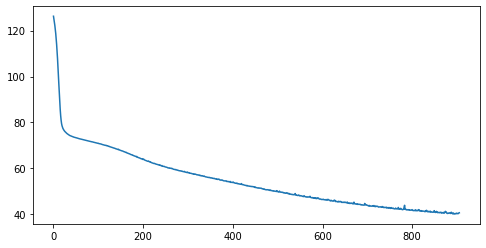

In [172]:
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
x = [i for i in range(len(NN.loss_curve_))]
axes.plot(x, NN.loss_curve_)
plt.show()

In [200]:
## New metric(Accuracy of top sellers)
accuracy_NN = []
accuracy_NN_tt = []
for i in range(len(datasets)):
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(datasets_x[i],
                                                        datasets_y[i],
                                                    test_size = 0.2,
                                                   random_state = 11)

    if i==0:
        NN = MLPRegressor(hidden_layer_sizes=(300,300,300), activation='relu',
                          learning_rate_init = 1e-4,
                          solver='adam',alpha=0.00005,max_iter=2000,
                          beta_1 = 0.8)
    else:
        NN = MLPRegressor(hidden_layer_sizes=(200,200,200), activation='relu',
                  learning_rate_init = 1e-4,
                  solver='adam',alpha=0.00005,max_iter=2000,
                  beta_1 = 0.75)
        

    
    NN.fit(X_train_i,y_train_i)
    pred_train_i = NN.predict(X_train_i)
    pred_test_i = NN.predict(X_test_i)
    
    sum_topsellers = 0
    correct_topsellers = 0
    correct_norm = 0
    
    for j in range(len(y_test_i)):
        if y_test_i[j] >= 18.5:
            sum_topsellers+=1
            if pred_test_i[j] >= 18.5:
                correct_topsellers += 1
        else:
            if pred_test_i[j] <18.5:
                correct_norm += 1
                
    accuracy_NN.append(correct_topsellers/sum_topsellers)
    accuracy_NN_tt.append((correct_norm+correct_topsellers)/len(y_test_i))
print('Total #top sellers:', sum_topsellers)
print('Accuracy: ', accuracy_NN)
print('total accuracy: ', accuracy_NN_tt)

Total #top sellers: 41
Accuracy:  [0.4634146341463415, 0.4878048780487805]
total accuracy:  [0.8967391304347826, 0.9021739130434783]


In [173]:
results_NN = np.array(NN_metrics)
print(results_NN.shape)
NN_results = pd.DataFrame(results_NN,columns= ['MSE_train','MSE_test',
                                               'MAE_train','MAE_test',
                                              'MAPE_train','MAPE_test',
                                              'r2_train','r2_test'])

potentials_names = ['reliable+new_potential',
                   'not_reliable+new_potential']
NN_results.index = potentials_names
display(NN_results)
# KN_results.to_csv('../dataset/results/KN_compare_seasonality.csv')

(2, 8)


,MSE_train,MSE_test,MAE_train,MAE_test,MAPE_train,MAPE_test,r2_train,r2_test
reliable+new_potential,81.418404,126.483489,4.645110,5.730874,0.606754,0.642938,0.477716,0.184361
not_reliable+new_potential,79.867879,131.463418,4.570352,5.880648,0.596278,0.658517,0.487662,0.152247


# xgboost

In [93]:
# Grid Search
##Grid search
optimal_hp = []
XG_dataframe = []

# parameters = {
#     'booster':'gbtree',
#     'objective':'reg:squarederror',
#     'gamma':0.1,
#     'max_depth':5,
#     'lambda':3,
#     'subsample':0.7,
#     'colsample_bytree':0.7,
#     'min_child_weight':3,
#     'slient':1,
#     'eta':0.1,
#     'seed':1000,
#     'nthread':4,
# }

tuned_parameters= {'n_estimators':[100,200,500],
                  'max_depth':range(3,12,2),# [3,5,7], ##range(3,10,2)
                  'learning_rate':np.arange(0.1,0.4,0.1),}

for i in range(len(datasets)):
    X_train, X_test, y_train, y_test = train_test_split(
        datasets_x[i], datasets_y[i], train_size=0.8, random_state=11)
    
    XG = xgb.XGBRegressor(max_depth=10,
                            learning_rate=0.1,
                            n_estimators=160,
                        #         silent=False,
                            objective='reg:squarederror')
    models = GridSearchCV(XG, 
                          param_grid= tuned_parameters,
                          scoring = 'neg_mean_squared_error',
                          n_jobs = -1,
                          cv = kf)
    
    grid = models.fit(X_train,y_train)
    reg = grid.best_estimator_
    print('--------Dataset ',i)
    print('best score: %f'%grid.best_score_)
    print('best parameters:')
    for key in tuned_parameters.keys():
        print('{}: {}'.format(key, reg.get_params()[key]))
        print('test score: %f'%reg.score(X_test, y_test))
    KN_dataframe.append(pd.DataFrame(grid.cv_results_).T)
# display(Ridge_dataframe)

--------Dataset  0
best score: -100.577719
best parameters:
booster: gbtree
test score: 0.566929
objective: reg:squarederror
test score: 0.566929
gamma: 0.0
test score: 0.566929
max_depth: 7
test score: 0.566929


KeyError: 'lambda'

In [116]:
## fine-tune --------------------------------------------
optimal_hp = []
XG_dataframe = []


tuned_parameters= {'n_estimators':[50,60,70,80,90],
                  'max_depth':[5,7,8],# [3,5,7], ##range(3,10,2)
                  'learning_rate':np.arange(0.07,0.11,0.01),
                  }

i ==0
X_train, X_test, y_train, y_test = train_test_split(
    datasets_x[i], datasets_y[i], train_size=0.8, random_state=11)

XG = xgb.XGBRegressor(max_depth=10,
                        learning_rate=0.1,
                        n_estimators=160,
                    #         silent=False,
                        objective='reg:squarederror')
models = GridSearchCV(XG, 
                      param_grid= tuned_parameters,
                      scoring = 'neg_mean_squared_error',
                      n_jobs = -1,
                      cv = kf)

grid = models.fit(X_train,y_train)
reg = grid.best_estimator_
print('--------Dataset ',i)
print('best score: %f'%grid.best_score_)
print('best parameters:')
for key in tuned_parameters.keys():
    print('{}: {}'.format(key, reg.get_params()[key]))
    print('test score: %f'%reg.score(X_test, y_test))
XG_dataframe.append(pd.DataFrame(grid.cv_results_).T)

--------Dataset  1
best score: -96.176683
best parameters:
n_estimators: 80
test score: 0.401534
max_depth: 7
test score: 0.401534
learning_rate: 0.07
test score: 0.401534


In [121]:
## validation
optimal_hp = []
XG_dataframe = []


tuned_parameters= {'n_estimators':[80],
                  'max_depth':[7],# [3,5,7], ##range(3,10,2)
                  'learning_rate':[0.1],
                  }

i ==0

X_train, X_test, y_train, y_test = train_test_split(
    datasets_x[i], datasets_y[i], train_size=0.8, random_state=11)

XG = xgb.XGBRegressor(max_depth=10,
                        learning_rate=0.1,
                        n_estimators=160,
                    #         silent=False,
                        objective='reg:squarederror')
models = GridSearchCV(XG, 
                      param_grid= tuned_parameters,
                      scoring = 'neg_mean_squared_error',
                      n_jobs = -1,
                      cv = kf)

grid = models.fit(X_train,y_train)
reg = grid.best_estimator_
print('--------Dataset ',i)
print('best score: %f'%grid.best_score_)
print('best parameters:')
for key in tuned_parameters.keys():
    print('{}: {}'.format(key, reg.get_params()[key]))
    print('test score: %f'%reg.score(X_test, y_test))
XG_dataframe.append(pd.DataFrame(grid.cv_results_).T)

--------Dataset  1
best score: -97.849416
best parameters:
n_estimators: 80
test score: 0.393839
max_depth: 7
test score: 0.393839
learning_rate: 0.1
test score: 0.393839


In [10]:

# params = {
#     'booster':'gbtree',
#     'objective':'reg:gamma',
#     'gamma':0.1,
#     'max_depth':5,
#     'lambda':3,
#     'subsample':0.7,
#     'colsample_bytree':0.7,
#     'min_child_weight':3,
#     'slient':1,
#     'eta':0.1,
#     'seed':1000,
#     'nthread':4,
# }

# tuned_parameters= [{'n_estimators':[100,200,500],
#                   'max_depth':range(3,12,2),# [3,5,7], ##range(3,10,2)
#                   'learning_rate':np.arange(0.1,0.4,0.1),
#                     'gamma':[i/10 for i in range(0,4)]
#                   }]

# time_start = time.time()
    

# ##Grid Search!
# xgboost = xgb.XGBRegressor(
#     max_depth=10,
#     learning_rate=0.1,
#     n_estimators=160,
# #         silent=False,
#     objective='reg:gamma')
# clf = GridSearchCV(xgboost,
#                   param_grid = tuned_parameters,
#                   scoring = 'neg_mean_absolute_error',
#                   n_jobs = -1,
# #                   iid = False,
#                   cv = kf)



# clf.fit(X_train,y_train)

# time_end = time.time()

# print(clf.best_params_)


# print('total time: ',time_end-time_start)



{'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
total time:  0.00016498565673828125


In [16]:
# XG_metrics = []

# time_start = time.time()

# for i in range(len(datasets)):
#     metrics = []
#     MSE_ave = 0
#     MAE_ave = 0
#     MAPE_ave = 0
#     r2_ave = 0

# #     X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(datasets_x[i],
# #                                                         datasets_y[i],
# #                                                     test_size = 0.2,
# #                                                    random_state = 666)
#     for train_idx,val_idx in kf.split(datasets_x[i],datasets_y[i]):
#         train_X_k = datasets_x[i][train_idx]
#         train_y_k = datasets_y[i][train_idx]
#         val_X_k = datasets_x[i][val_idx]
#         val_y_k = datasets_y[i][val_idx]

#         xgboost = xgb.XGBRegressor(
#             max_depth=7,
#             learning_rate=0.2,
#             n_estimators=200,
#         #         silent=False,
#             objective='reg:gamma')

#         xgboost.fit(train_X_k,train_y_k)
#         pred_train_i = xgboost.predict(train_X_k)
#         pred_test_i = xgboost.predict(val_X_k)
    
#         metrics_list = [MSE,MAE,MAPE,sklearn.metrics.r2_score]

#         for f in metrics_list:
#             metric_result_train = f(train_y_k,pred_train_i)
#             metrics.append(metric_result_train)
#             metric_result_test = f(val_y_k,pred_test_i)
#             metrics.append(metric_result_test)
    
#     metrics = np.array(metrics).reshape(k,8)
#     metrics_i = []
#     for j in range(metrics.shape[1]):
#         metrics_i.append(metrics[:,j].mean())
    


    
#     XG_metrics.append(metrics_i)

# time_end = time.time()

# total_time = time_end-time_start
# print('total time: ', total_time)
# print(XG_metrics)

# ##fitting
# xgboost = xgb.XGBRegressor(
#     max_depth=7,
#     learning_rate=0.2,
#     n_estimators=200,
# #         silent=False,
#     objective='reg:gamma')

# xgboost.fit(X_train,y_train)

# pred = xgboost.predict(X_test)

# ##metrics
# MSE_xgb = MSE(y_test,pred)
# MAE_xgb = MAE(y_test,pred)
# MAPE_xgb = MAPE(y_test,pred)
# r2_xgb = sklearn.metrics.r2_score(y_test,pred)

# print('MSE: ', MSE_xgb)
# print('MAE: ', MAE_xgb)
# print('MAPE: ', MAPE_xgb)
# print('r2: ', r2_xgb)

# print(xgboost.feature_importances_)

total time:  10.09591031074524
[[16.059949838455626, 99.84616526228103, 1.5321520608820927, 4.477764756682119, 0.15299302214947633, 0.48687508994761225, 0.8968878046365936, 0.4003282192473466], [13.332939978677176, 97.63837733982804, 1.2916035639077954, 4.459009915793087, 0.12041831865329854, 0.4787736856250841, 0.9146148293876788, 0.4059359463924012]]


In [119]:
XG_metrics = []

time_start = time.time()

for i in range(len(datasets)):
    metrics = []
    MSE_ave = 0
    MAE_ave = 0
    MAPE_ave = 0
    r2_ave = 0

    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(datasets_x[i],
                                                        datasets_y[i],
                                                    test_size = 0.2,
                                                   random_state = 11)
    
    if i == 0:
        XG = xgb.XGBRegressor(
        max_depth=7,
        learning_rate=0.1,
        n_estimators=80,
    #         silent=False,
        objective='reg:squarederror')
    else:
        XG = xgb.XGBRegressor(
        max_depth=7,
        learning_rate=0.03,
        n_estimators=200,
    #         silent=False,
        objective='reg:squarederror')

    XG.fit(X_train_i,y_train_i)
    pred_train_i = XG.predict(X_train_i)
    pred_test_i = XG.predict(X_test_i)

    metrics_list = [MSE,MAE,MAPE,sklearn.metrics.r2_score]

    for f in metrics_list:
        metric_result_train = f(y_train_i,pred_train_i)
        metrics.append(metric_result_train)
        metric_result_test = f(y_test_i,pred_test_i)
        metrics.append(metric_result_test)
    

    
    XG_metrics.append(metrics)

time_end = time.time()

total_time = time_end-time_start
print('total time: ', total_time)
print(XG_metrics)

total time:  1.274242639541626
[[23.034444169393, 66.64228725600398, 2.6798983626263535, 4.212790816481938, 0.35346868457519565, 0.4889054231249999, 0.8522382722660128, 0.570251764315763], [19.320879120042886, 93.3114219181898, 2.5919898714069425, 4.524739703319898, 0.35322832724648223, 0.5141812404076588, 0.8760601098458246, 0.39827366992244473]]


In [336]:
## New metric(Accuracy of top sellers)
accuracy_XG = []
accuracy_XG_tt = []
threshold = 18.5
for i in range(len(datasets)):
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(datasets_x[i],
                                                        datasets_y[i],
                                                    test_size = 0.2,
                                                   random_state = 11)

    if i == 0:
        XG = xgb.XGBRegressor(
        max_depth=7,
        learning_rate=0.1,
        n_estimators=80,
    #         silent=False,
        objective='reg:squarederror')
    else:
        XG = xgb.XGBRegressor(
        max_depth=7,
        learning_rate=0.03,
        n_estimators=200,
    #         silent=False,
        objective='reg:squarederror')

    XG.fit(X_train_i,y_train_i)
    pred_train_i = XG.predict(X_train_i)
    pred_test_i = XG.predict(X_test_i)
    
    sum_topsellers = 0
    correct_topsellers = 0
    correct_norm = 0
    
    for j in range(len(y_test_i)):
        if y_test_i[j] >= threshold:
            sum_topsellers+=1
            if pred_test_i[j] >= threshold:
                correct_topsellers += 1
        else:
            if pred_test_i[j] <threshold:
                correct_norm += 1
                
    accuracy_XG.append(correct_topsellers/sum_topsellers)
    accuracy_XG_tt.append((correct_norm+correct_topsellers)/len(y_test_i))
print('Total #top sellers:', sum_topsellers)
print('Accuracy: ', accuracy_XG)
print('total accuracy: ', accuracy_XG_tt)

Total #top sellers: 41
Accuracy:  [0.5365853658536586, 0.5365853658536586]
total accuracy:  [0.907608695652174, 0.904891304347826]


In [202]:
print(len(y_test_i))

368


In [321]:
results_XG = np.array(XG_metrics)
print(results_XG.shape)
XG_results = pd.DataFrame(results_XG,columns= ['MSE_train','MSE_test',
                                               'MAE_train','MAE_test',
                                              'MAPE_train','MAPE_test',
                                              'r2_train','r2_test'])

potentials_names = ['reliable+new_potential',
                   'not_reliable+new_potential']
XG_results.index = potentials_names
display(XG_results)

(2, 8)


,MSE_train,MSE_test,MAE_train,MAE_test,MAPE_train,MAPE_test,r2_train,r2_test
reliable+new_potential,23.034444,66.642287,2.679898,4.212791,0.353469,0.488905,0.852238,0.570252
not_reliable+new_potential,19.320879,93.311422,2.591990,4.524740,0.353228,0.514181,0.876060,0.398274


In [288]:
print(len(XG.feature_importances_))

103


In [322]:
features_names = list(data_table_new)
print(len(features_names))
features_names.remove('potential_025')
features_names.remove('product_id')
feature_importance = pd.Series(XG.feature_importances_,
                                 index = features_names)
display(feature_importance)
print(type(feature_importance))

105


season_summer                          0.017879
season_winter                          0.019513
embellishments_belted                  0.000000
embellishments_buttons                 0.005231
embellishments_fabric embellishment    0.003727
                                         ...   
Polyamide                              0.002795
Polyamide enduit                       0.000000
Polyester                              0.010800
Polypropylene                          0.000000
Viscose                                0.008514
Length: 103, dtype: float32

<class 'pandas.core.series.Series'>


In [323]:
feature_importance_XGB_full = feature_importance.sort_values(ascending = False)
for i in range(len(feature_importance_XGB_full)):
    if list(feature_importance.index)[i] in remove_list:
        del feature_importance_XGB_full[list(feature_importance.index)[i]]
print(len(feature_importance_XGB_full))

display(feature_importance_XGB_full)
print(list(feature_importance.index))
feature_importance_XGB_full.to_csv('task1 XGB_full_FI.csv')

96


Elasthanne                              0.123754
Coton                                   0.102842
col_batea                               0.068527
basique                                 0.055714
sans_manches                            0.047001
                                          ...   
col_bateau                              0.000000
pattern type fallback_fabric/texture    0.000000
cache_coeur                             0.000000
tops silhouette_loose/relaxed           0.000000
tops silhouette_tight                   0.000000
Length: 96, dtype: float32

['season_summer', 'season_winter', 'embellishments_belted', 'embellishments_buttons', 'embellishments_fabric embellishment', 'embellishments_fringe', 'embellishments_fur', 'embellishments_pockets', 'embellishments_sequins', 'embellishments_simple', 'embellishments_tie closure', 'embellishments_zippers', 'pattern type_animal', 'pattern type_floral', 'pattern type_geometric/tribal', 'pattern type_graphics', 'pattern type_metallic', 'pattern type_motives', 'pattern type_polka dots', 'pattern type_solid color', 'pattern type_squares/diamonds', 'pattern type_stripes', 'pattern type_text/numbers/letters', 'pattern type fallback_fabric/texture', 'pattern type fallback_full print', 'pattern type fallback_positional print', 'pattern type fallback_solid colors', 'shoulders_covered shoulders', 'shoulders_off shoulder', 'shoulders_one shoulder', 'shoulders_spaghetti strap', 'shoulders_wide strap', 'tops silhouette_crop top', 'tops silhouette_loose/relaxed', 'tops silhouette_regular', 'tops silhoue

In [324]:
display(feature_importance_XGB_full[feature_importance_XGB_full == 0])

Polyamide enduit                        0.0
pattern type_animal                     0.0
Lyocell                                 0.0
Autres fibres                           0.0
embellishments_fringe                   0.0
embellishments_fur                      0.0
embellishments_pockets                  0.0
embellishments_tie closure              0.0
embellishments_zippers                  0.0
col_roulé                               0.0
col_polo                                0.0
pattern type_polka dots                 0.0
col_fendu                               0.0
pattern type_squares/diamonds           0.0
col_bénit                               0.0
col_bateau                              0.0
pattern type fallback_fabric/texture    0.0
cache_coeur                             0.0
tops silhouette_loose/relaxed           0.0
tops silhouette_tight                   0.0
dtype: float32

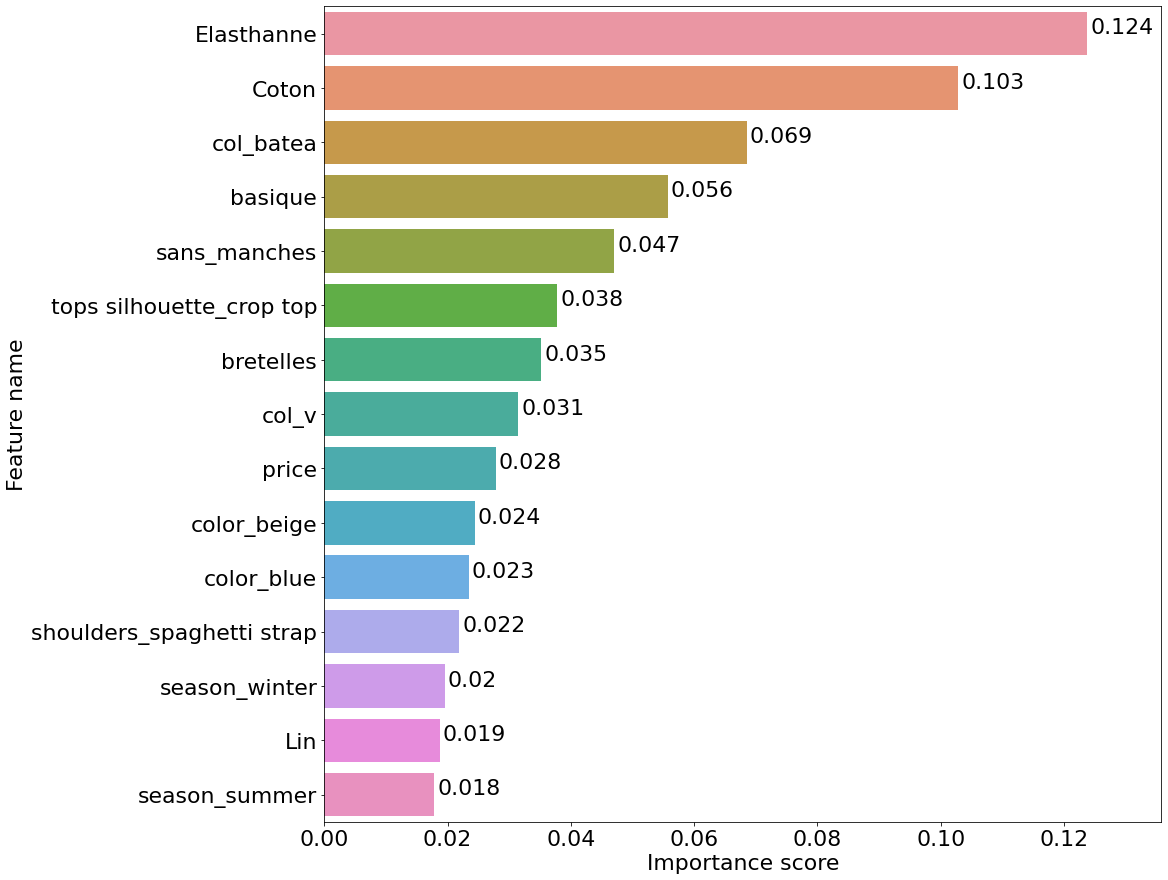

In [327]:
plt.figure(figsize=(15,15))
# sorted_counts = data_table['Elasthanne'].value_counts()
# print(sorted_counts.head())
g = sns.barplot(y=feature_importance_XGB_full.iloc[:15].index,
                x=feature_importance_XGB_full.iloc[:15].values,
                orient = 'h')

g.set_ylabel('Feature name', fontsize=22)
g.set_xlabel('Importance score', fontsize=22)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.xlim(0,feature_importance_XGB_full.values[0]+0.012)

for i in range(15):
    g.text(feature_importance_XGB_full.values[i]+5e-4,
           i,
           np.round(feature_importance_XGB_full.values[i],3), 
           color="black",ha="left",fontsize = 22)
plt.savefig("../../../saved_figs/Feature Importance/task1 FI XGB FULL.pdf",dpi=1200,bbox_inches = 'tight')
plt.show()

### ------------------Human-source Feature Importance

In [328]:
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(datasets_x[0],
                                                    datasets_y[0],
                                                test_size = 0.2,
                                               random_state = 11)

# if i ==0:
XG = xgb.XGBRegressor(
max_depth=7,
learning_rate=0.1,
n_estimators=80,
#         silent=False,
objective='reg:squarederror')


XG.fit(X_train_i,y_train_i)
pred_train_i = XG.predict(X_train_i)
pred_test_i = XG.predict(X_test_i)

In [329]:
features_names = list(data_table_rnew)
print(len(features_names))
features_names.remove('potential_025')
features_names.remove('product_id')
feature_importance = pd.Series(XG.feature_importances_,
                                 index = features_names)
display(feature_importance)
print(type(feature_importance))

71


body                0.010742
bretelles           0.030556
cache_coeur         0.000000
col_batea           0.059630
col_bateau          0.000000
                      ...   
Polyamide           0.005304
Polyamide enduit    0.000000
Polyester           0.011804
Polypropylene       0.000000
Viscose             0.010857
Length: 69, dtype: float32

<class 'pandas.core.series.Series'>


In [330]:
feature_importance_XGB_human = feature_importance.sort_values(ascending = False)
for i in range(len(feature_importance_XGB_human)):
    if list(feature_importance.index)[i] in remove_list:
        del feature_importance_XGB_human[list(feature_importance.index)[i]]
print(len(feature_importance_XGB_human))

display(feature_importance_XGB_human)
print(list(feature_importance_XGB_human.index))
feature_importance_XGB_human.to_csv('task1 XGB_human_FI.csv')

65


Elasthanne                 0.151852
Coton                      0.124130
col_batea                  0.059630
season_summer              0.048231
tshirt_standard_45/65cm    0.045301
                             ...   
col_fendu                  0.000000
Autres fibres              0.000000
col_polo                   0.000000
col_roulé                  0.000000
Lyocell                    0.000000
Length: 65, dtype: float32

['Elasthanne', 'Coton', 'col_batea', 'season_summer', 'tshirt_standard_45/65cm', 'sans_manches', 'price', 'bretelles', 'col_v', 'Lin', 'divers', 'season_winter', 'basique', 'manches_3/4', 'color_yellow', 'color_pink', 'color_purple', 'color_beige', 'tshirt_court_(<45cm)', 'color_blue', 'Polyester', 'col_rond', 'tshirt_asymétrique', 'Viscose', 'body', 'manches_courtes', 'color_white', 'color_brown', 'color_green', 'col_rapporté', 'color_grey', 'manches_longues', 'col_carré', 'fines', 'débardeur', 'color_orange', 'color_red', 'Polyamide', 'message', 'Modal', 'dentelle', 'sans_col', 'brodé', 'col_montant', 'maille', 'Acrylique', 'col_bénitier', 'Fibre metallisée', 'col_monta', 'color_black', 'cropped', 'tshirt_long_(>65cm)', 'imprimé', 'tshirt_bandeau', 'côtelé', 'dos_nu', 'Polyamide enduit', 'cache_coeur', 'col_bateau', 'col_bénit', 'col_fendu', 'Autres fibres', 'col_polo', 'col_roulé', 'Lyocell']


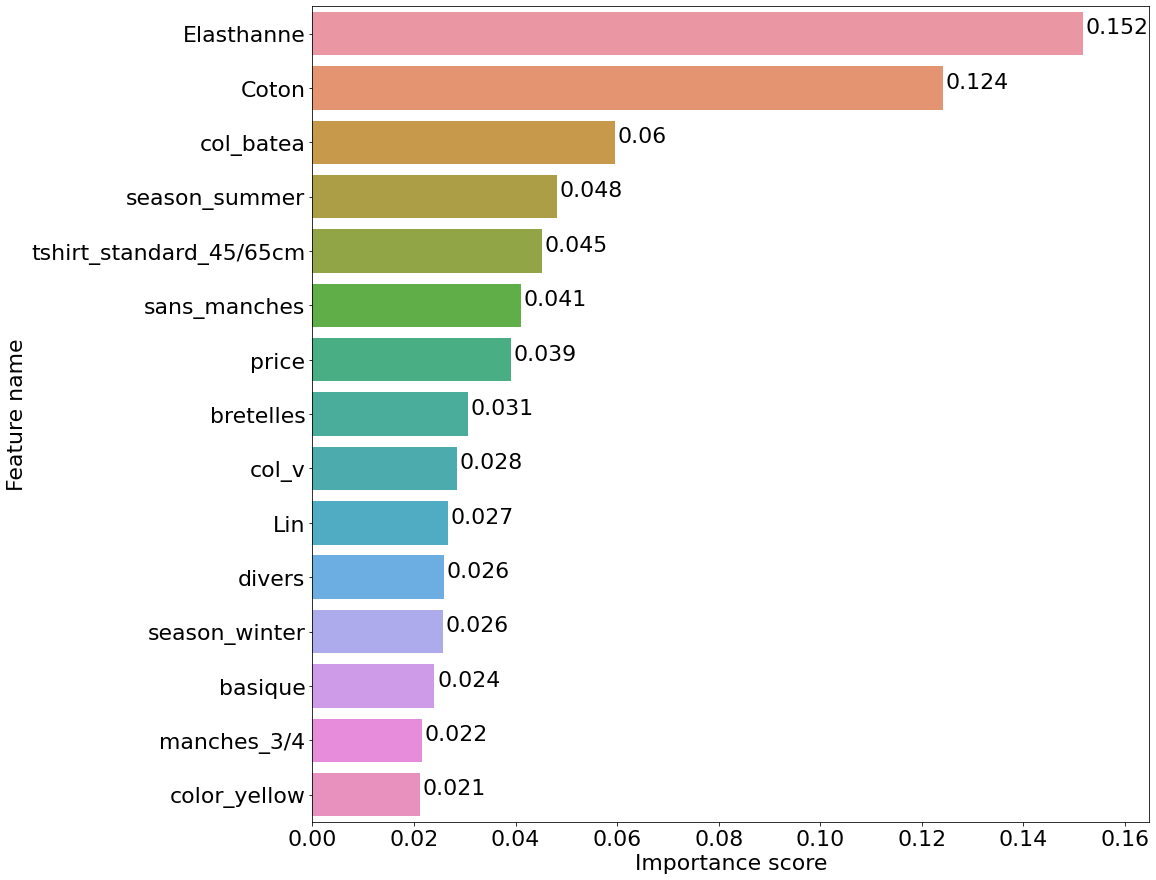

In [333]:
plt.figure(figsize=(15,15))
# sorted_counts = data_table['Elasthanne'].value_counts()
# print(sorted_counts.head())
g = sns.barplot(y=feature_importance_XGB_human.iloc[:15].index,
                x=feature_importance_XGB_human.iloc[:15].values,
                orient = 'h')
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
g.set_ylabel('Feature name', fontsize=22)
g.set_xlabel('Importance score', fontsize=22)
plt.xlim(0,feature_importance_XGB_human.values[0]+0.013)



for i in range(15):
    g.text(feature_importance_XGB_human.values[i]+5e-4,
           i,
           np.round(feature_importance_XGB_human.values[i],3), 
           color="black",ha="left",fontsize = 22)
plt.savefig("../../../saved_figs/Feature Importance/task1 FI XGB HUMAN.pdf",dpi=1200,bbox_inches = 'tight')
plt.show()

In [ ]:
plt.figure(figsize=(15,15))
# sorted_counts = data_table['Elasthanne'].value_counts()
# print(sorted_counts.head())
g = sns.barplot(y=feature_importance_XGB_full.iloc[:15].index,
                x=feature_importance_XGB_full.iloc[:15].values,
                orient = 'h')

g.set_ylabel('Feature name', fontsize=22)
g.set_xlabel('Importance score', fontsize=22)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.xlim(0,feature_importance_XGB_full.values[0]+0.012)

for i in range(15):
    g.text(feature_importance_XGB_full.values[i]+5e-4,
           i,
           np.round(feature_importance_XGB_full.values[i],3), 
           color="black",ha="left",fontsize = 22)
plt.savefig("../../../saved_figs/Feature Importance/task1 FI XGB FULL.pdf",dpi=1200,bbox_inches = 'tight')
plt.show()